In [2]:
import numpy as np
import MDAnalysis as mda
import sys
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
def exponential_func(x, A, B):
    return (A * np.exp(-(x-1) /B)) 


from scipy.special import legendre
l2 = legendre(2)
l1 = legendre(1)

from pathlib import Path
base = Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a")
psfpath = base / "water.psf"
dcdpath = base / "dcd/water.2000.280.0.dyna2.2.dcd"
u = mda.Universe(psfpath, dcdpath)

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
list(u.atoms[:3])

[<Atom 1: H of type HT of resname TIP3, resid 1 and segid TIP3>,
 <Atom 2: O of type OT of resname TIP3, resid 1 and segid TIP3>,
 <Atom 3: H1 of type HT of resname TIP3, resid 1 and segid TIP3>]

In [4]:
from MDAnalysis.analysis import rdf
water_rdf_1 = """2.4615076480275357 0.059468174017968334
2.512692313398513 0.3882072509136556
2.5574974407667312 1.423799138515099
2.5603163063958574 1.1114688268079047
2.589246769431628 1.9059735224445984
2.602945467313522 2.388157797130691
2.6548719394290066 2.6347046867350117
2.6890939572422585 2.8429051130266214
2.7816714389567228 2.5853201390640375
2.801551859709508 2.3825695196554055
2.8774634165640496 1.9715690201721972
2.9164824513251135 1.6482599686463002
2.992047831698885 1.2756158232323962
3.1762631732514377 0.8645559792096273
3.4116631801749673 0.7822352120825458
3.717534827826654 0.8916566522756137
4.0769154686487745 1.072281649184752
4.563787961960149 1.1268093902843077
5.197439283117961 0.9182430059987414
5.504695636692729 0.874239029914591
6.099575192004312 0.9615843013911327
6.658353485749892 1.0489493543808615
7.2905706472016565 0.9992878655252708
7.88648873195555 0.971564074793899
8.698618755841729 0.9875574282054682
9.330341379463821 0.992690730877456
10.449431034226963 0.9975569831214215
11.31596021937698 0.9861232684994214
"""

water_rdf_2 = """2.412776412776413 0.03828650785172538
2.515970515970516 0.438436064523021
2.5454545454545454 1.142826621087491
2.633906633906634 1.9951287255635082
2.751842751842752 2.482256169212691
2.86977886977887 2.065035786774917
2.9729729729729732 1.4999679521418652
3.194103194103194 0.9437666915927785
3.385749385749386 0.8483922657835701
3.8574938574938575 0.9882063882063881
4.211302211302211 1.0582843713278498
4.535626535626536 1.0500587544065805
4.88943488943489 1.0157889114410854
5.213759213759214 0.9988676423459031
5.523341523341523 0.9471423993163122
5.803439803439803 0.9388526866787736
6.083538083538084 0.9653455827368871
6.378378378378379 1.0179468005554961
6.658476658476658 1.0444396966136096
6.968058968058967 1.036192714453584
7.616707616707616 1.0110458284371329
8.132678132678132 1.0030979596196985
8.737100737100738 1.0039739344087169
9.533169533169533 0.9964320051276572
9.93120393120393 1.01440017092191
"""


def plot_rdf_exp(ax, shift=0, c="k", lw=0.5, linestyle="--", marker="o"):
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_1.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        "-",
        fillstyle="none",
        marker=marker,
        c=c,
        alpha=0.5,
        label="[Hura, 2003]",
        linewidth=lw,
    )
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_2.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        linestyle,
        fillstyle="none",
        c=c,
        alpha=0.5,
        marker=marker,
        label="[Soper, 2007]",
        linewidth=lw,
    )
    return ax

In [362]:
temperatures = np.arange(230.0, 380.0, 10.0)
import seaborn as sns
# from ff_energy.simulations import charmm, plots
base = Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a")
#  matplotlib styles
plt.style.use(["science", "no-latex", "ieee"])
all_rdfs = []
# ureg = pint.UnitRegistry()
# colors = sns.cubehelix_palette(start=.5, rot=-.5)
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i in temperatures[::3]:
    dcdpath = base / f"dcd/water.2000.{i}.dyna2.2.dcd"
    u = mda.Universe(psfpath, dcdpath)
    rdf = mda.analysis.rdf.InterRDF(u.select_atoms("type OT"), 
                                    u.select_atoms("type OT"),
                                    nbins=100, range=(1,10), verbose=True)
    rdf.run()
    all_rdfs.append(rdf)
    c += 1

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/369 [00:00<?, ?it/s]

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/460 [00:00<?, ?it/s]

  0%|          | 0/364 [00:00<?, ?it/s]

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0.5, 0, '$r~[\\mathrm{Å}]$')

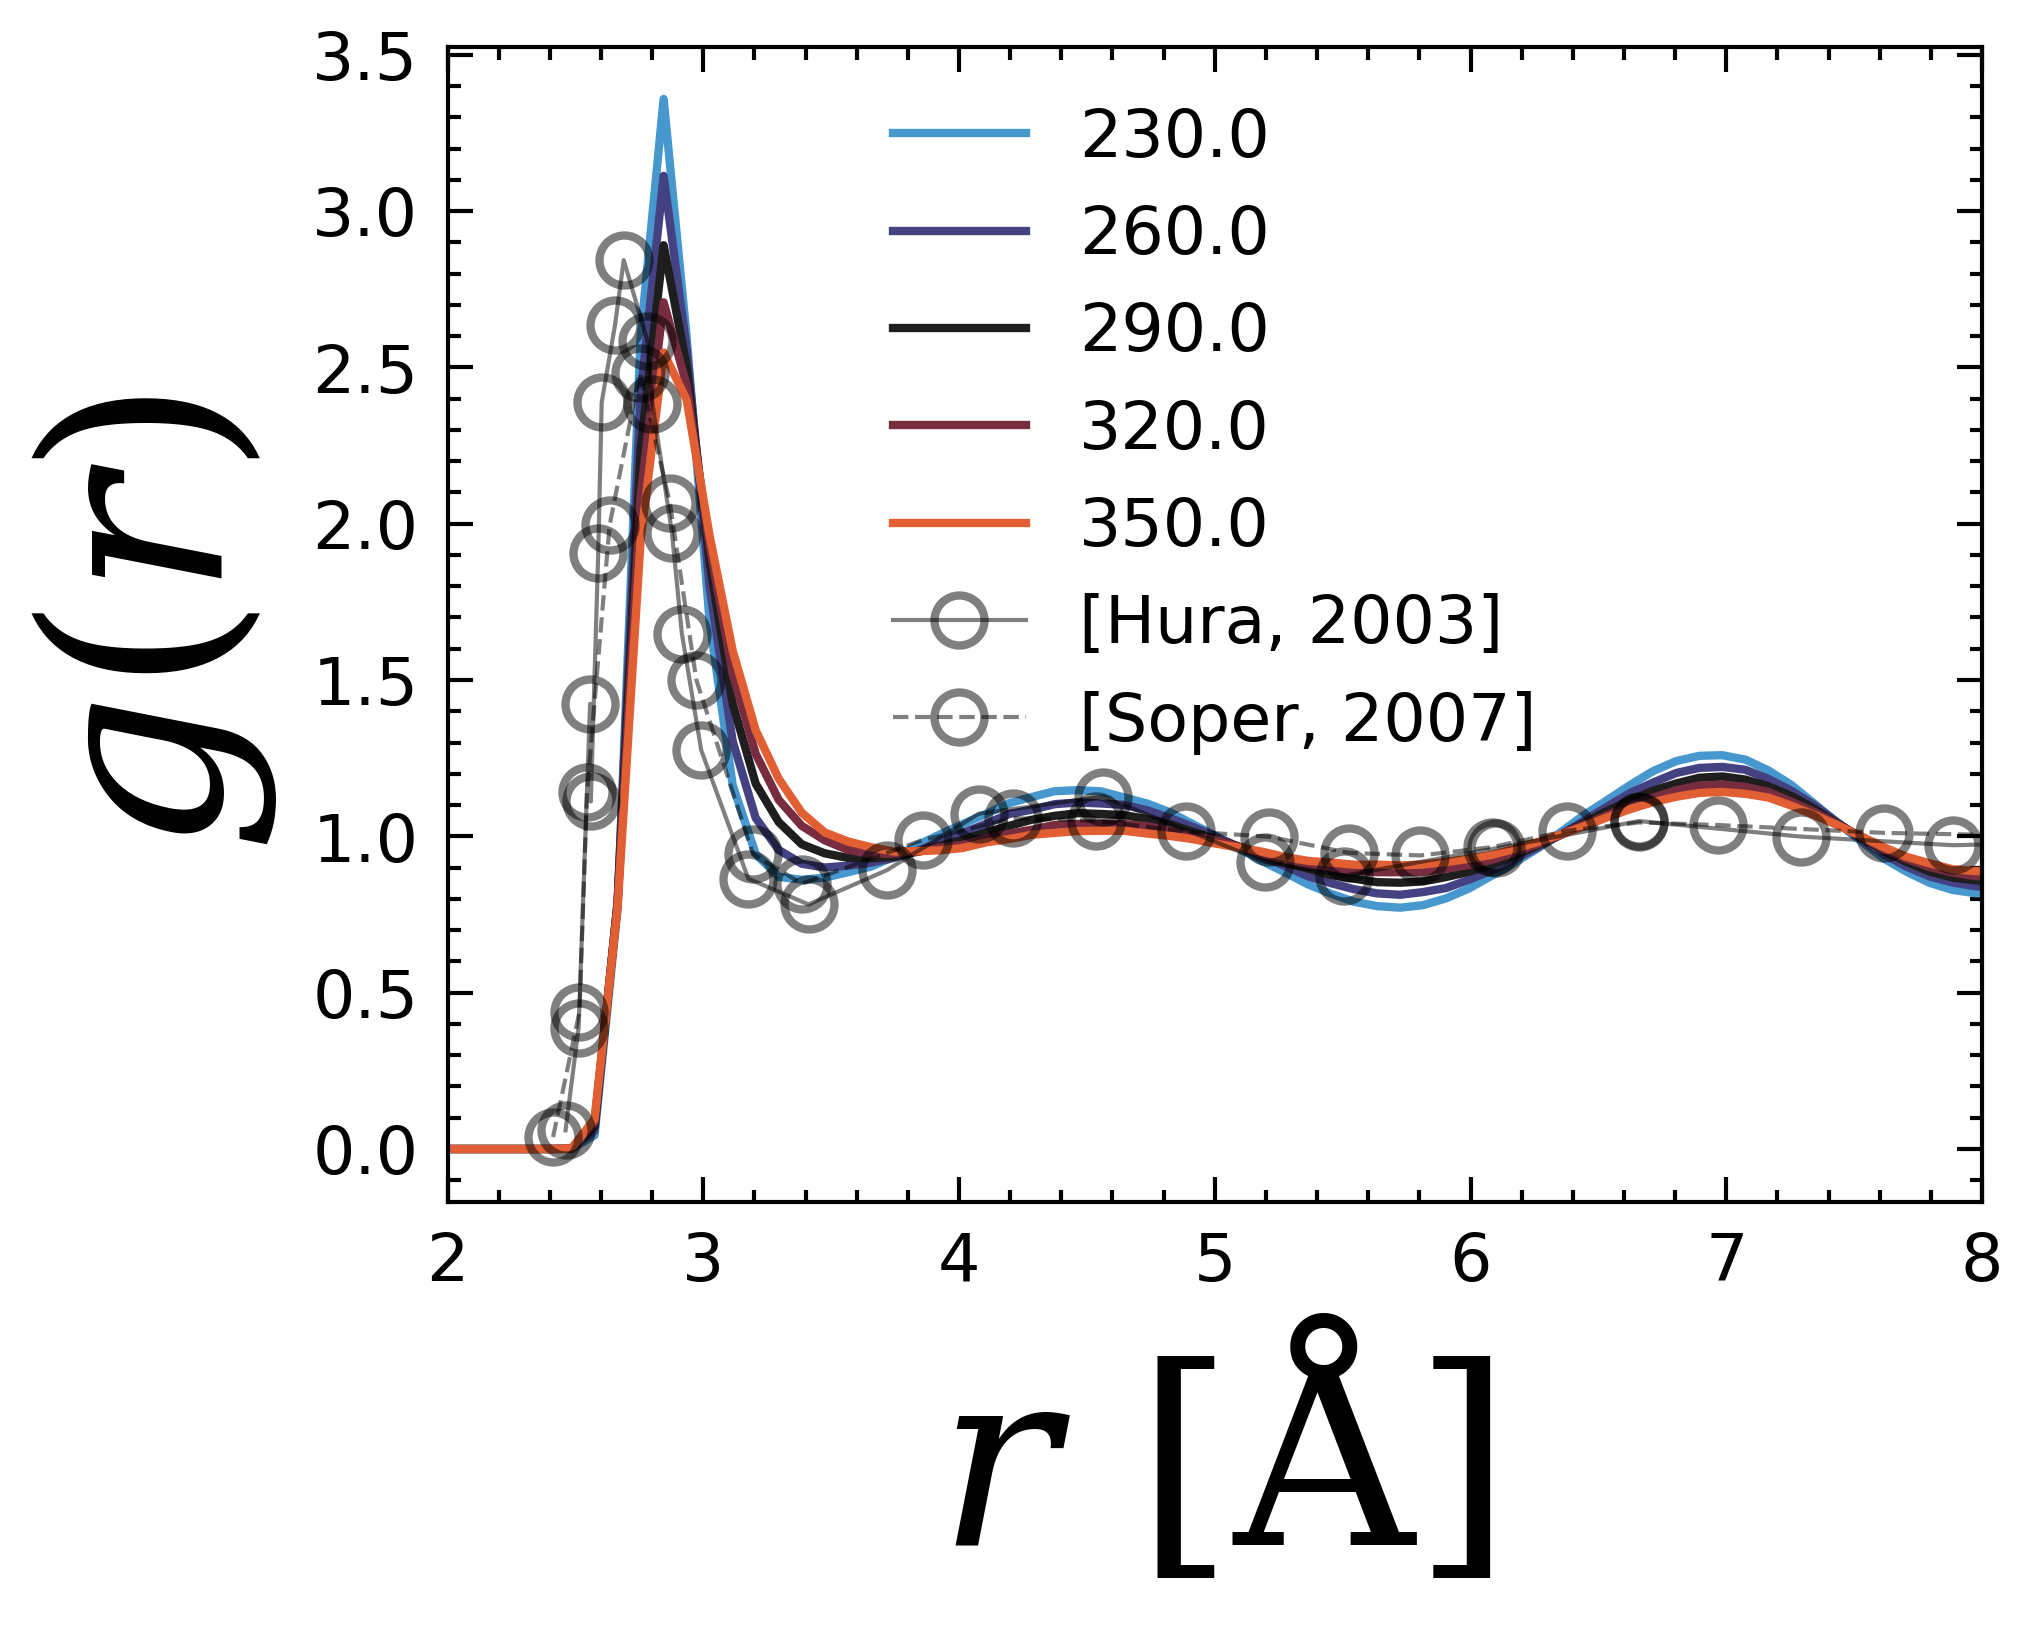

In [363]:
FONTSIZE = 30
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i, T in enumerate(temperatures[::3]):
    rdf = all_rdfs[c]
    # all_rdfs.append(rdf)
    plt.plot(rdf.bins, rdf.rdf, "-", label=T, color=colors[c])
    c += 1
    
ax = plt.gca()
plot_rdf_exp(ax, shift=0, c="k", lw=0.5, 
             linestyle="--", marker="o")
plt.xlim(2,8)
plt.legend()
ax.set_ylabel("$g(r)$", fontsize=FONTSIZE)
ax.set_xlabel("$r~[\mathrm{Å}]$", fontsize=FONTSIZE)

In [61]:
colors

[(0.27923924, 0.59522877, 0.80669803),
 (0.2659204, 0.25949691, 0.511417),
 (0.12284806, 0.1179729, 0.11772022),
 (0.47151732, 0.17401641, 0.24610337),
 (0.8866469, 0.37249496, 0.1997976)]

In [52]:
# rdf = mda.analysis.rdf.InterRDF(u, [[u.select_atoms("name OH2"), u.select_atoms("name OH2")]])

In [21]:
subprocess.run(["pwd"]) 

/home/boittier/Documents/phd/water-knn/notebooks


CompletedProcess(args=['pwd'], returncode=0)

In [23]:
# os.chdir("water-knn/notebooks/")
# os.chdir("../..")

from ase.visualize import view
import MDAnalysis as mda
from MDAnalysis.coordinates.XYZ import XYZWriter as XYZWriter
from ase import Atoms
import numpy as np

In [31]:
c = 0
for i in temperatures[::3]:
    dcdpath = base / f"dcd/water.2000.{i}.dyna2.2.dcd"
    u = mda.Universe(psfpath, dcdpath)
    # os.chdir("../")
    with XYZWriter(f'q/k/{i}.oto.xyz', remark="{} {} {}".format(*ts.dimensions[:3])) as w:
        for ii, ts in enumerate(u.trajectory[::3]):
            atoms = u.select_atoms("type OT")
            # print(atoms)
            w.write(atoms)

In [33]:
import subprocess

subprocess.run(["ls", "-l"]) 

total 78272
-rw-rw-r-- 1 boittier boittier    71885 Feb 24 18:36 CCSD_param_thermodynamics.ipynb
-rw-rw-r-- 1 boittier boittier    48340 Feb 17 11:03 diffusion.ipynb
-rw-rw-r-- 1 boittier boittier 78399531 Mär 28 14:00 hexamers-vdos_entropy.ipynb
-rw-rw-r-- 1 boittier boittier   168389 Mär 27 13:57 hydration_free_energy.ipynb
-rw-rw-r-- 1 boittier boittier   696826 Nov  8  2024 IR-sensitivity.ipynb
drwxrwxr-x 4 boittier boittier     4096 Jun 17 17:25 q
-rw-rw-r-- 1 boittier boittier   744579 Jun 17 17:45 StructureVtemperature.ipynb


CompletedProcess(args=['ls', '-l'], returncode=0)

In [34]:
import os
# os.chdir("oto")
temperatures[::3]

array([230., 260., 290., 320., 350.])

In [37]:
# for i in temperatures[::3]:
#     files = Path("q/k").glob(f"{i}*xyz")
#     for file in files:
#         print("file", file)
#         subprocess.run(["order", file, "-t", "oto"])


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


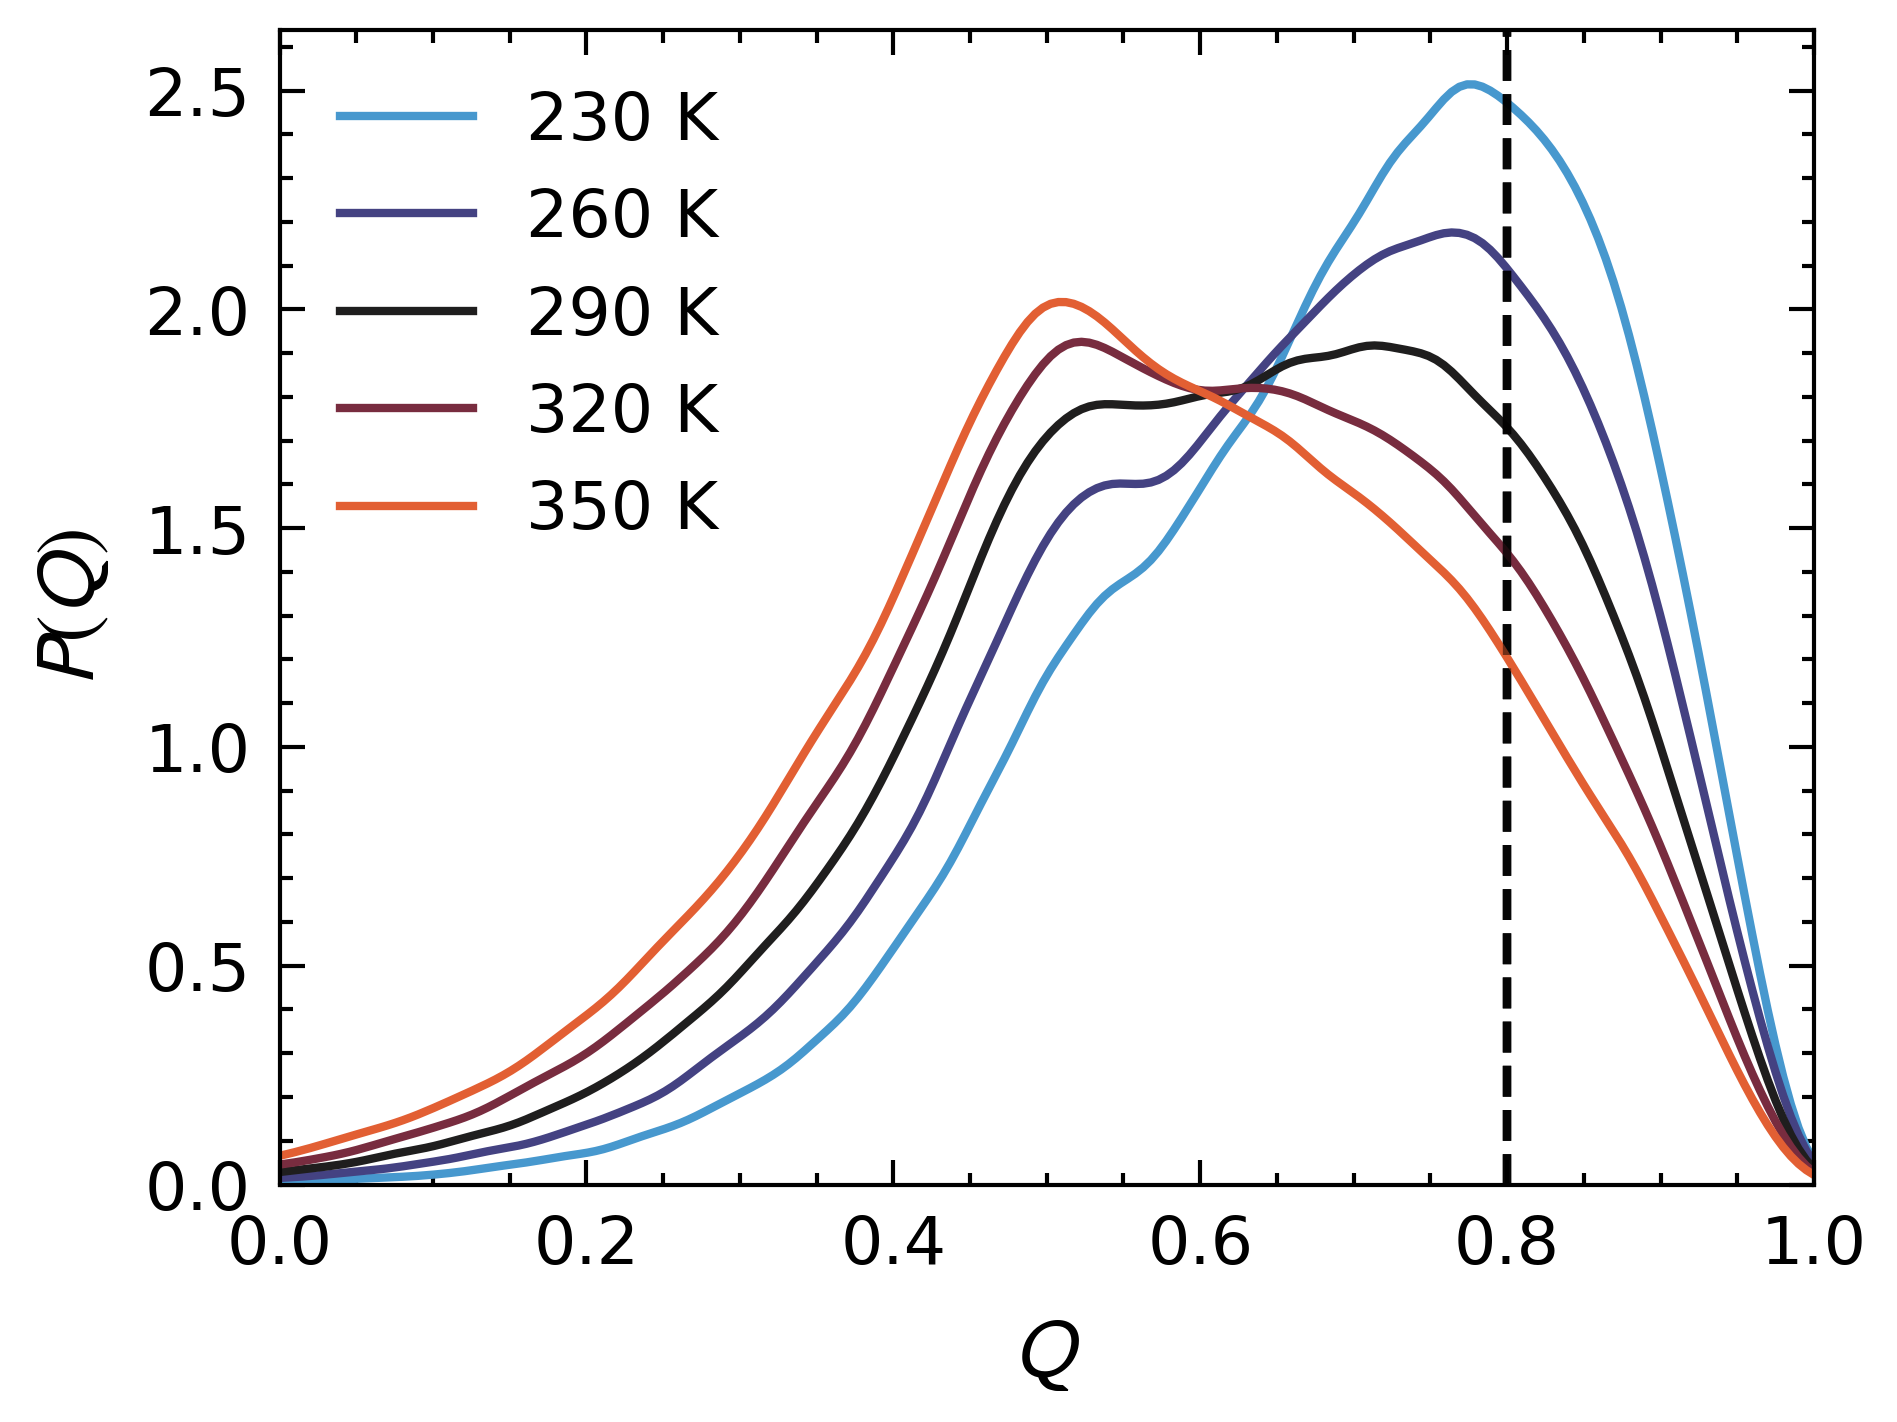

In [ ]:
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i in temperatures[::3][:]:
    KMDCMoto = np.concatenate([np.loadtxt(_) for _ in list(Path(".").glob(f"{i}*raw.dat"))])
    FONTSIZE=10
    # plt.plot(data[1,0], np.mean(data[0,:], axis=0))
    # yErr = stats.sem(data[:,1], axis=0)
    # yErr = np.mean(data[:,1], axis=0)
    scale = 0.02
    # plt.errorbar(data[1,0], np.mean(data[:,1], axis=0)*scale, yerr=yErr*0, c="b")
    plt.xlabel("$Q$", fontsize=FONTSIZE)
    plt.ylabel("$P(Q)$", fontsize=FONTSIZE)
    ax = plt.gca()
    # sns.kdeplot(kmdcm,ax=ax, label="kMDCM-RKHS", 
    #             color="blue", clip= (-1.0, 1.0))
    # sns.kdeplot(shake, ax=ax, label="TIP3 (SHAKE)", color="orange",
    #             linestyle="-", clip= (0, 1.0))
    sns.kdeplot(KMDCMoto, ax=ax, label=f"{i:.0f} K", color=colors[c],
                linestyle="-", clip= (0, 1.0))
    # sns.kdeplot(SWM4oto, ax=ax, label="SWM4", color="r",
    #             linestyle="-", clip= (0, 1.0))
    # sns.kdeplot(SHAKEoto, ax=ax, label="TIP3 (SHAKE)", color="orange",
    #             linestyle="-", clip= (0, 1.0))
    ax.axvline(0.8, color="black", linestyle="--", alpha=0.51)
    c += 1
    plt.xlim(0, 1)

# plt.legend()
# sns.kdeplot(SWM4oto, ax=ax, label="SWM4", color="gray",
#             linestyle="-", marker="o",clip= (0, 1.0), alpha=0.15)
# sns.kdeplot(SHAKEoto, ax=ax, label="TIP3", color="gray",
#             linestyle="-", marker="x", clip= (0, 1.0), alpha=0.15)

plt.legend()
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt

with open("/home/boittier/pcbach/kmdcm_water_sim_rkhs1/rdf.dat") as f:
    lines = f.readlines()
    results = [[float(x) for x in _.split()] for _ in lines]
results = np.array(results)

with open("/home/boittier/pcbach/shake/shake-rdf.dat") as f:
    lines = f.readlines()
    Sresults = [[float(x) for x in _.split()] for _ in lines]
Sresults = np.array(Sresults)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


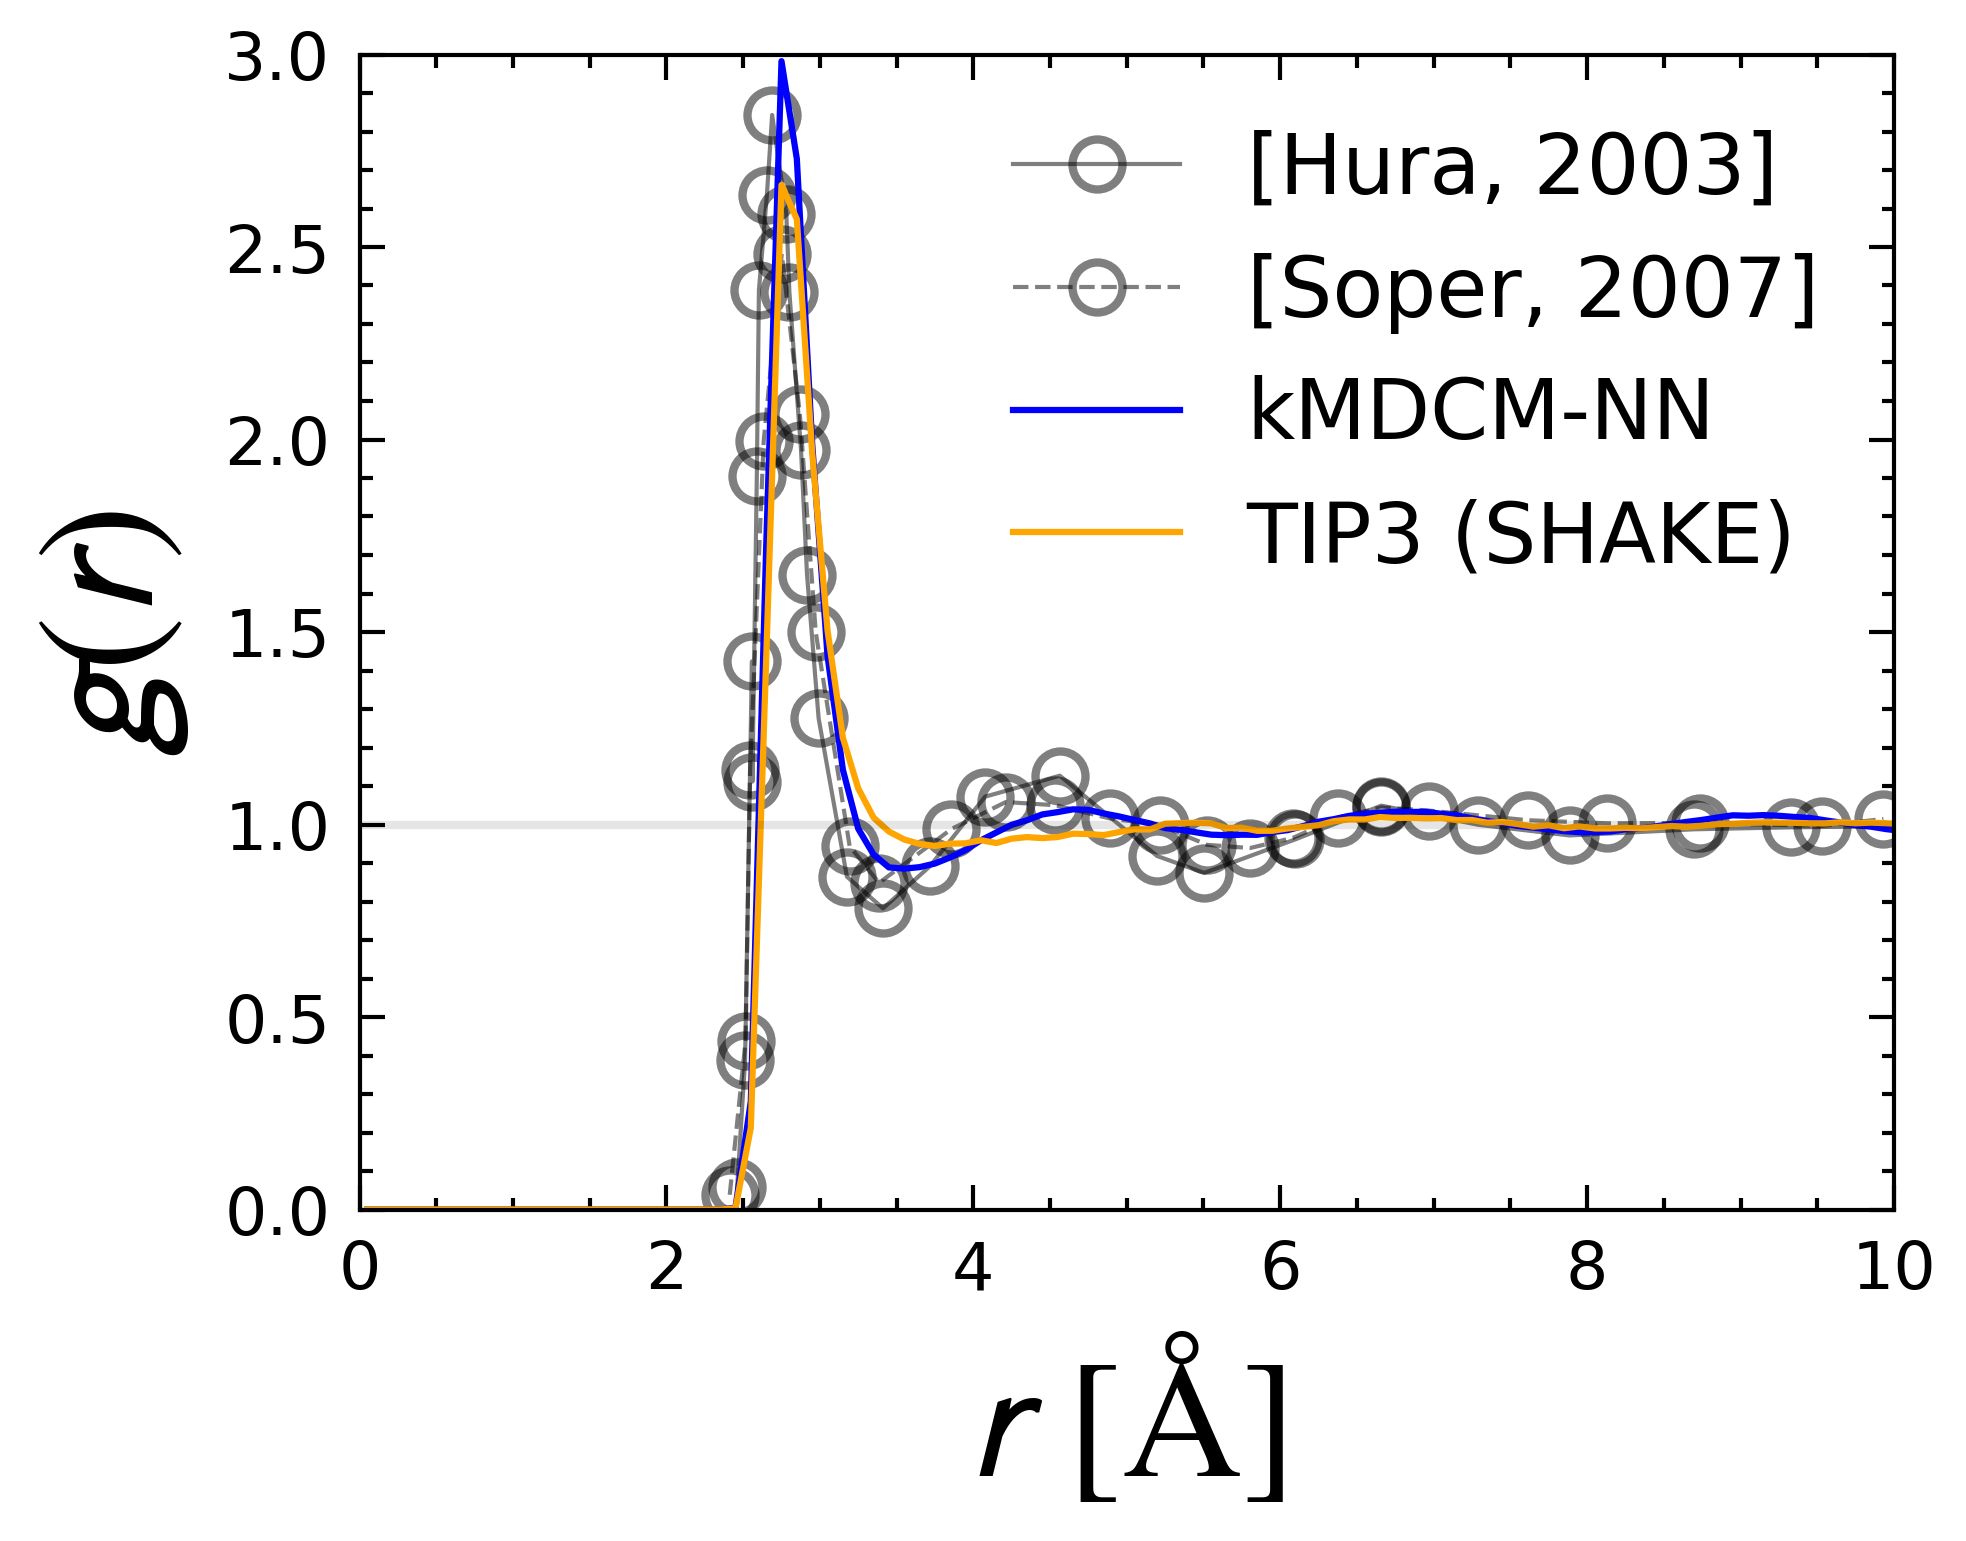

In [53]:
FONTSIZE=20

ax2 = plt.gca()


plot_rdf_exp(ax2)
ax2.plot(*results.T, label="kMDCM-NN", color="blue", linewidth=0.75)
ax2.plot(*Sresults.T, label="TIP3 (SHAKE)", alpha=1, 
        color="orange", linestyle="-", linewidth=0.75)
ax2.legend(fontsize=FONTSIZE//2)
ax2.set_ylabel("$g(r)$", fontsize=FONTSIZE)
ax2.set_xlabel("$r~[Å]$", fontsize=FONTSIZE)
# plt.savefig("rdf_.pdf", bbox_inches="tight")
ax2.set_xlim(0,10)
ax2.set_ylim(0,3)
ax2.axhline(1, color="k", alpha=0.1)
# plt.savefig("kmdcm-rdf-231129.pdf", bbox_inches="tight")

In [4]:
from MDAnalysis.analysis import rdf
water_rdf_1 = """2.4615076480275357 0.059468174017968334
2.512692313398513 0.3882072509136556
2.5574974407667312 1.423799138515099
2.5603163063958574 1.1114688268079047
2.589246769431628 1.9059735224445984
2.602945467313522 2.388157797130691
2.6548719394290066 2.6347046867350117
2.6890939572422585 2.8429051130266214
2.7816714389567228 2.5853201390640375
2.801551859709508 2.3825695196554055
2.8774634165640496 1.9715690201721972
2.9164824513251135 1.6482599686463002
2.992047831698885 1.2756158232323962
3.1762631732514377 0.8645559792096273
3.4116631801749673 0.7822352120825458
3.717534827826654 0.8916566522756137
4.0769154686487745 1.072281649184752
4.563787961960149 1.1268093902843077
5.197439283117961 0.9182430059987414
5.504695636692729 0.874239029914591
6.099575192004312 0.9615843013911327
6.658353485749892 1.0489493543808615
7.2905706472016565 0.9992878655252708
7.88648873195555 0.971564074793899
8.698618755841729 0.9875574282054682
9.330341379463821 0.992690730877456
10.449431034226963 0.9975569831214215
11.31596021937698 0.9861232684994214
"""

water_rdf_2 = """2.412776412776413 0.03828650785172538
2.515970515970516 0.438436064523021
2.5454545454545454 1.142826621087491
2.633906633906634 1.9951287255635082
2.751842751842752 2.482256169212691
2.86977886977887 2.065035786774917
2.9729729729729732 1.4999679521418652
3.194103194103194 0.9437666915927785
3.385749385749386 0.8483922657835701
3.8574938574938575 0.9882063882063881
4.211302211302211 1.0582843713278498
4.535626535626536 1.0500587544065805
4.88943488943489 1.0157889114410854
5.213759213759214 0.9988676423459031
5.523341523341523 0.9471423993163122
5.803439803439803 0.9388526866787736
6.083538083538084 0.9653455827368871
6.378378378378379 1.0179468005554961
6.658476658476658 1.0444396966136096
6.968058968058967 1.036192714453584
7.616707616707616 1.0110458284371329
8.132678132678132 1.0030979596196985
8.737100737100738 1.0039739344087169
9.533169533169533 0.9964320051276572
9.93120393120393 1.01440017092191
"""


def plot_rdf_exp(ax, shift=0, c="k", lw=0.5, linestyle="--", marker="o"):
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_1.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        "-",
        fillstyle="none",
        marker=marker,
        c=c,
        alpha=0.5,
        label="[Hura, 2003]",
        linewidth=lw,
    )
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_2.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        linestyle,
        fillstyle="none",
        c=c,
        alpha=0.5,
        marker=marker,
        label="[Soper, 2007]",
        linewidth=lw,
    )
    return ax

In [55]:

dcdpath = base / f"dcd/water.2000.dyna2.2.dcd"
u = mda.Universe(psfpath, dcdpath)
rdf300 = mda.analysis.rdf.InterRDF(u.select_atoms("type OT"), 
                                u.select_atoms("type OT"),
                                nbins=100, range=(1,10), verbose=True)
rdf300.run()

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 0, '$r~[\\mathrm{Å}]$')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


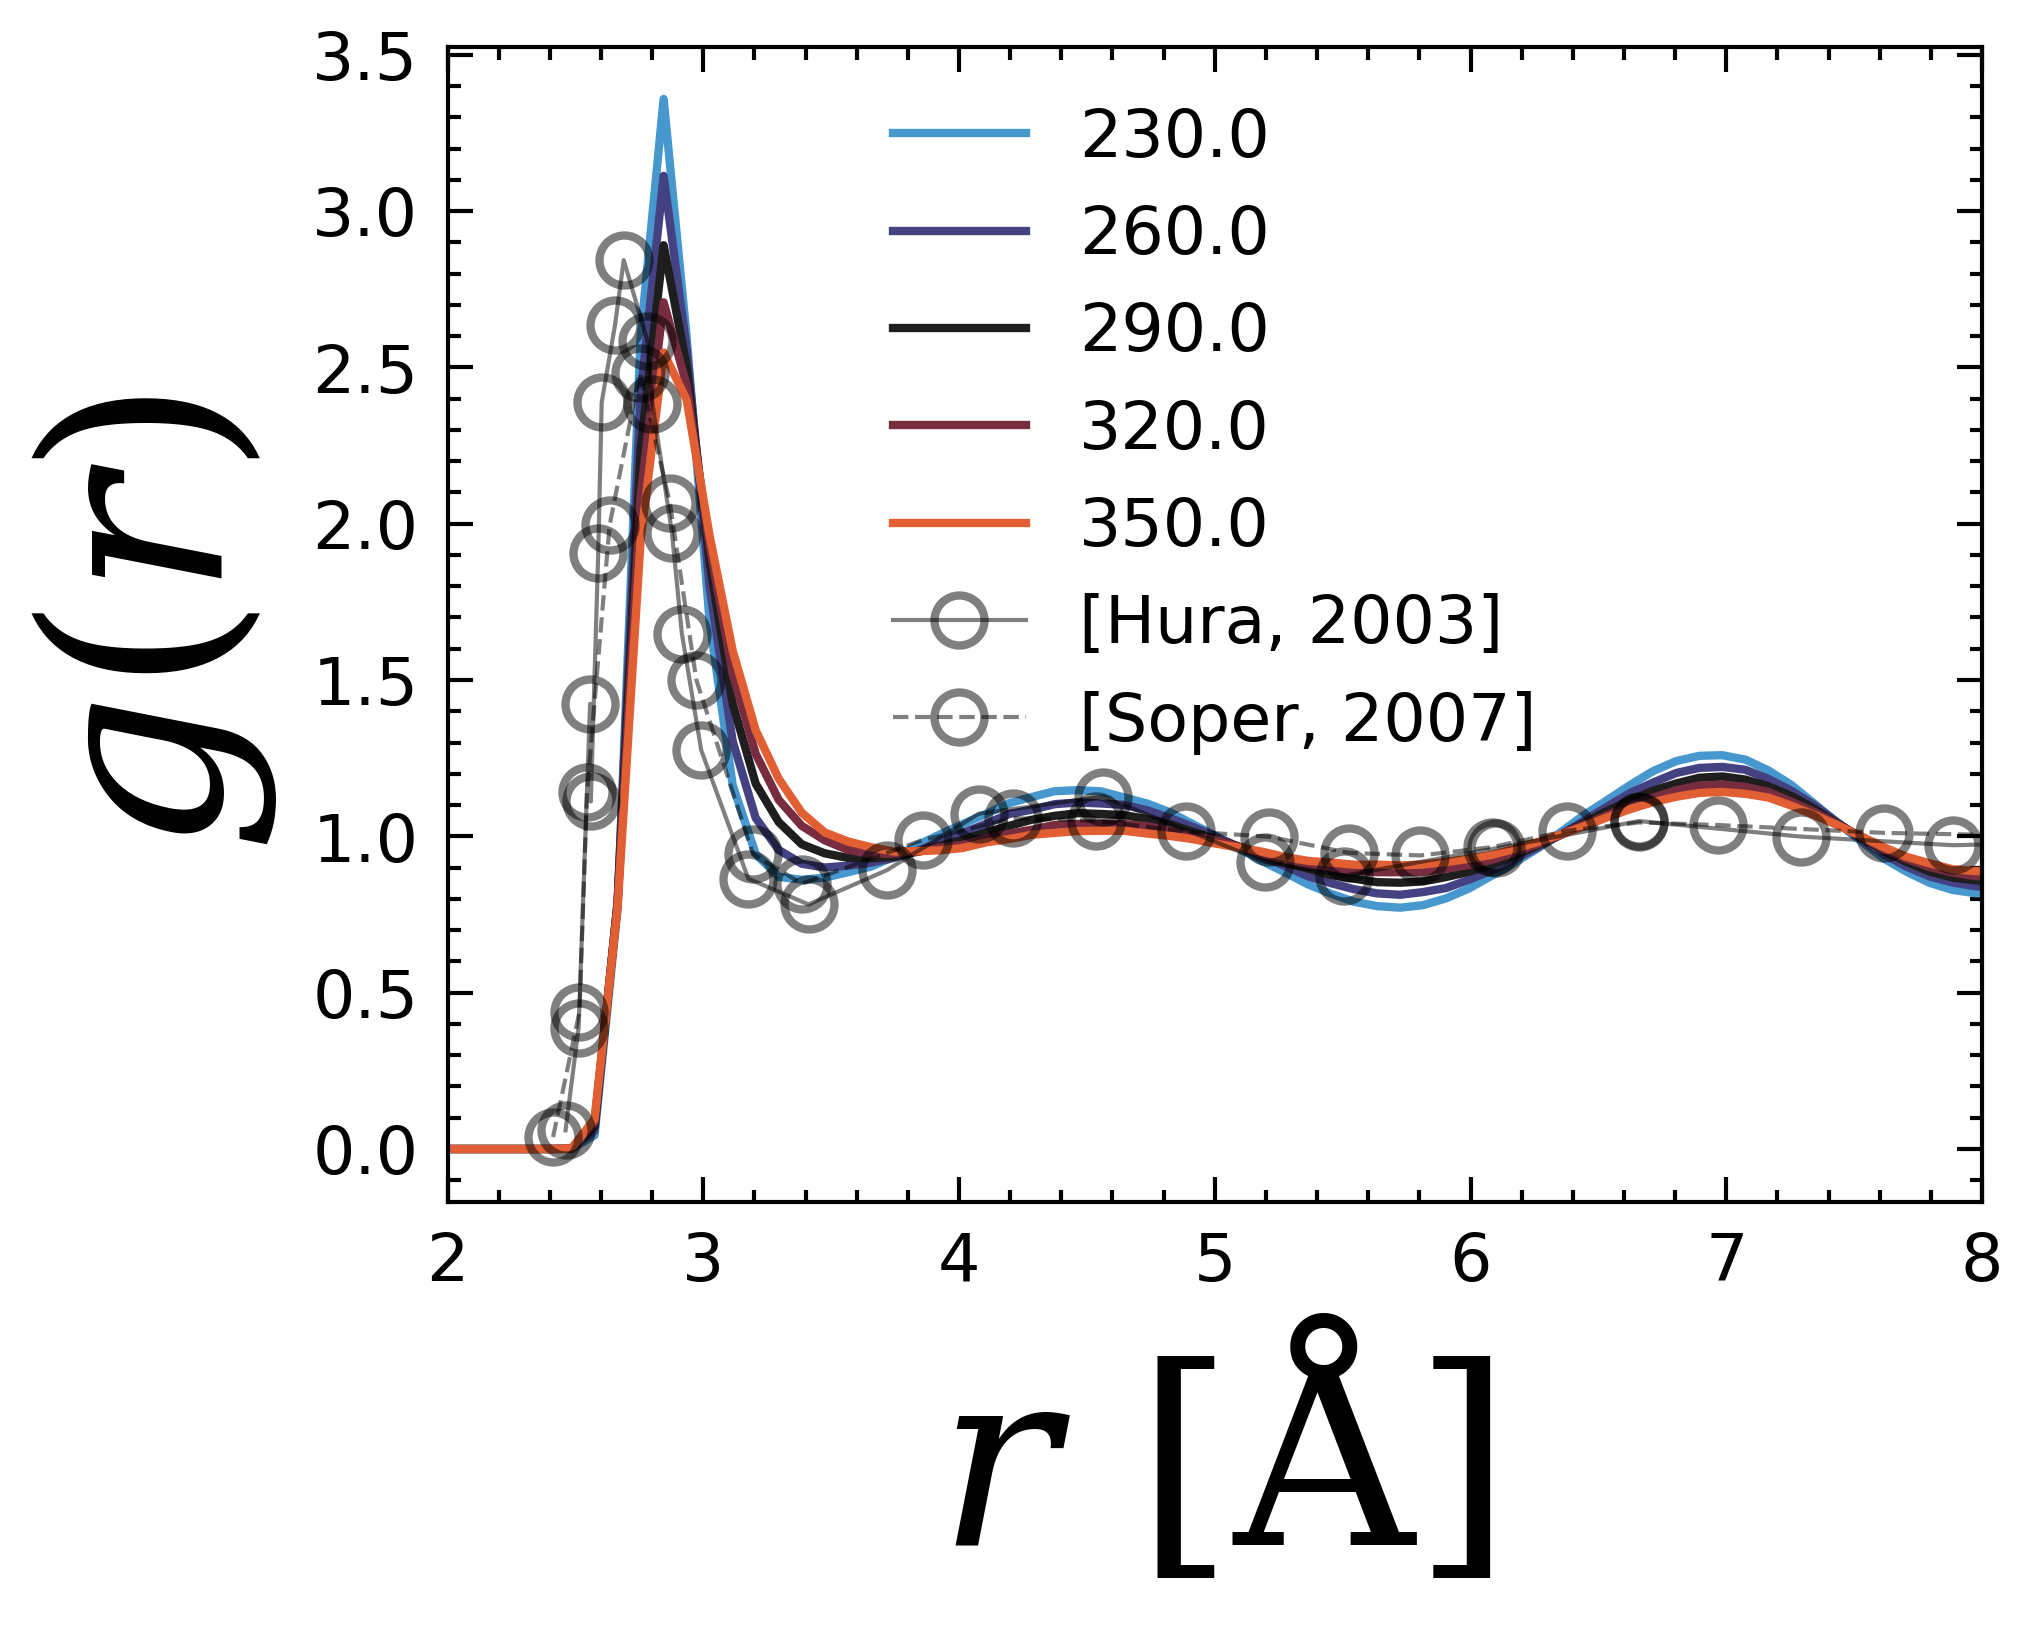

In [10]:
FONTSIZE = 30
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i, T in enumerate(temperatures[::3]):
    rdf = all_rdfs[c]
    # all_rdfs.append(rdf)
    plt.plot(rdf.bins, rdf.rdf, "-", label=T, color=colors[c])
    c += 1
    
ax = plt.gca()
plot_rdf_exp(ax, shift=0, c="k", lw=0.5, 
             linestyle="--", marker="o")
plt.xlim(2,8)
plt.legend()
ax.set_ylabel("$g(r)$", fontsize=FONTSIZE)
ax.set_xlabel("$r~[\mathrm{Å}]$", fontsize=FONTSIZE)

In [66]:
oto_files = Path("/home/boittier/Documents/phd/ff_energy/notebooks/playground/oto")
oto_files2 = Path("/home/boittier/Documents/phd/ff_energy/notebooks/playground/oto2")
KMDCMoto_300 = np.concatenate([np.loadtxt(_) for _ in list(oto_files.glob("*raw.dat"))])

In [60]:
SWM4oto = np.concatenate([np.loadtxt(_) for _ in list(oto_files2.glob("*raw.dat"))])
SHAKEoto = np.concatenate([np.loadtxt(_) for _ in ["/home/boittier/Documents/phd/ff_energy/notebooks/playground/shake_comb_oto_raw.dat"]])

In [41]:
FONTSIZE = 16

import matplotlib.pyplot as mpl
import numpy as np
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{siunitx}',  # i need upright \micro symbols, but you need...
    r'\sisetup{detect-all}',  # ...this to force siunitx to actually use your fonts
    r'\usepackage{helvet}',  # set the normal font here
    r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
    r'\sansmath'  # <- tricky! -- gotta actually tell tex to use!
]

import pylab as plt
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

/tmp/ipykernel_616272/905573497.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [


In [390]:
def Qplot(ax):
    ax.axvline(0.8, color="black", linestyle="--", alpha=0.51)
    sns.kdeplot(KMDCMoto_300, ax=ax, color="k", 
                    linestyle="-", clip= (-1.0, 1.0))
    sns.kdeplot(SHAKEoto, ax=ax, color="b", 
                    linestyle="-", clip= (-1.0, 1.0))
    sns.kdeplot(SWM4oto, ax=ax, color="r", 
                    linestyle="-", clip= (-1.0, 1.0))

    ax.hist(KMDCMoto_300,   label=f"M-DFT",
            density=True,color="k",
                    linestyle="-", bins=100, alpha=0.4, range= (-1.0, 1.0))

    ax.hist(SHAKEoto,   label=f"TIP3",
                    density=True, color="b",
                    linestyle="-", bins=100,  alpha=0.4,range= (-1.0, 1.0))

    ax.hist(SWM4oto,   label=f"SWM4",
                    density=True, color="r",
                    linestyle="-", bins=100,  alpha=0.4, range= (-1.0, 1.0))

    ax.set_xlim(-0.5,1)
    ax.legend(fontsize=5)
    return ax

In [61]:
KMDCMoto = np.concatenate(
        [np.loadtxt(_) for _ in list(Path(".").glob(f"{i}*raw.dat")) for i in [290,320]]
    )

(array([2.00000e+00, 8.00000e+00, 9.40000e+01, 9.50000e+02, 7.15200e+03,
        3.29220e+04, 1.02928e+05, 1.67200e+05, 1.29766e+05, 4.69780e+04]),
 array([-0.80305279, -0.62277149, -0.4424902 , -0.26220891, -0.08192761,
         0.09835368,  0.27863497,  0.45891627,  0.63919756,  0.81947885,
         0.99976015]),
 <BarContainer object of 10 artists>)

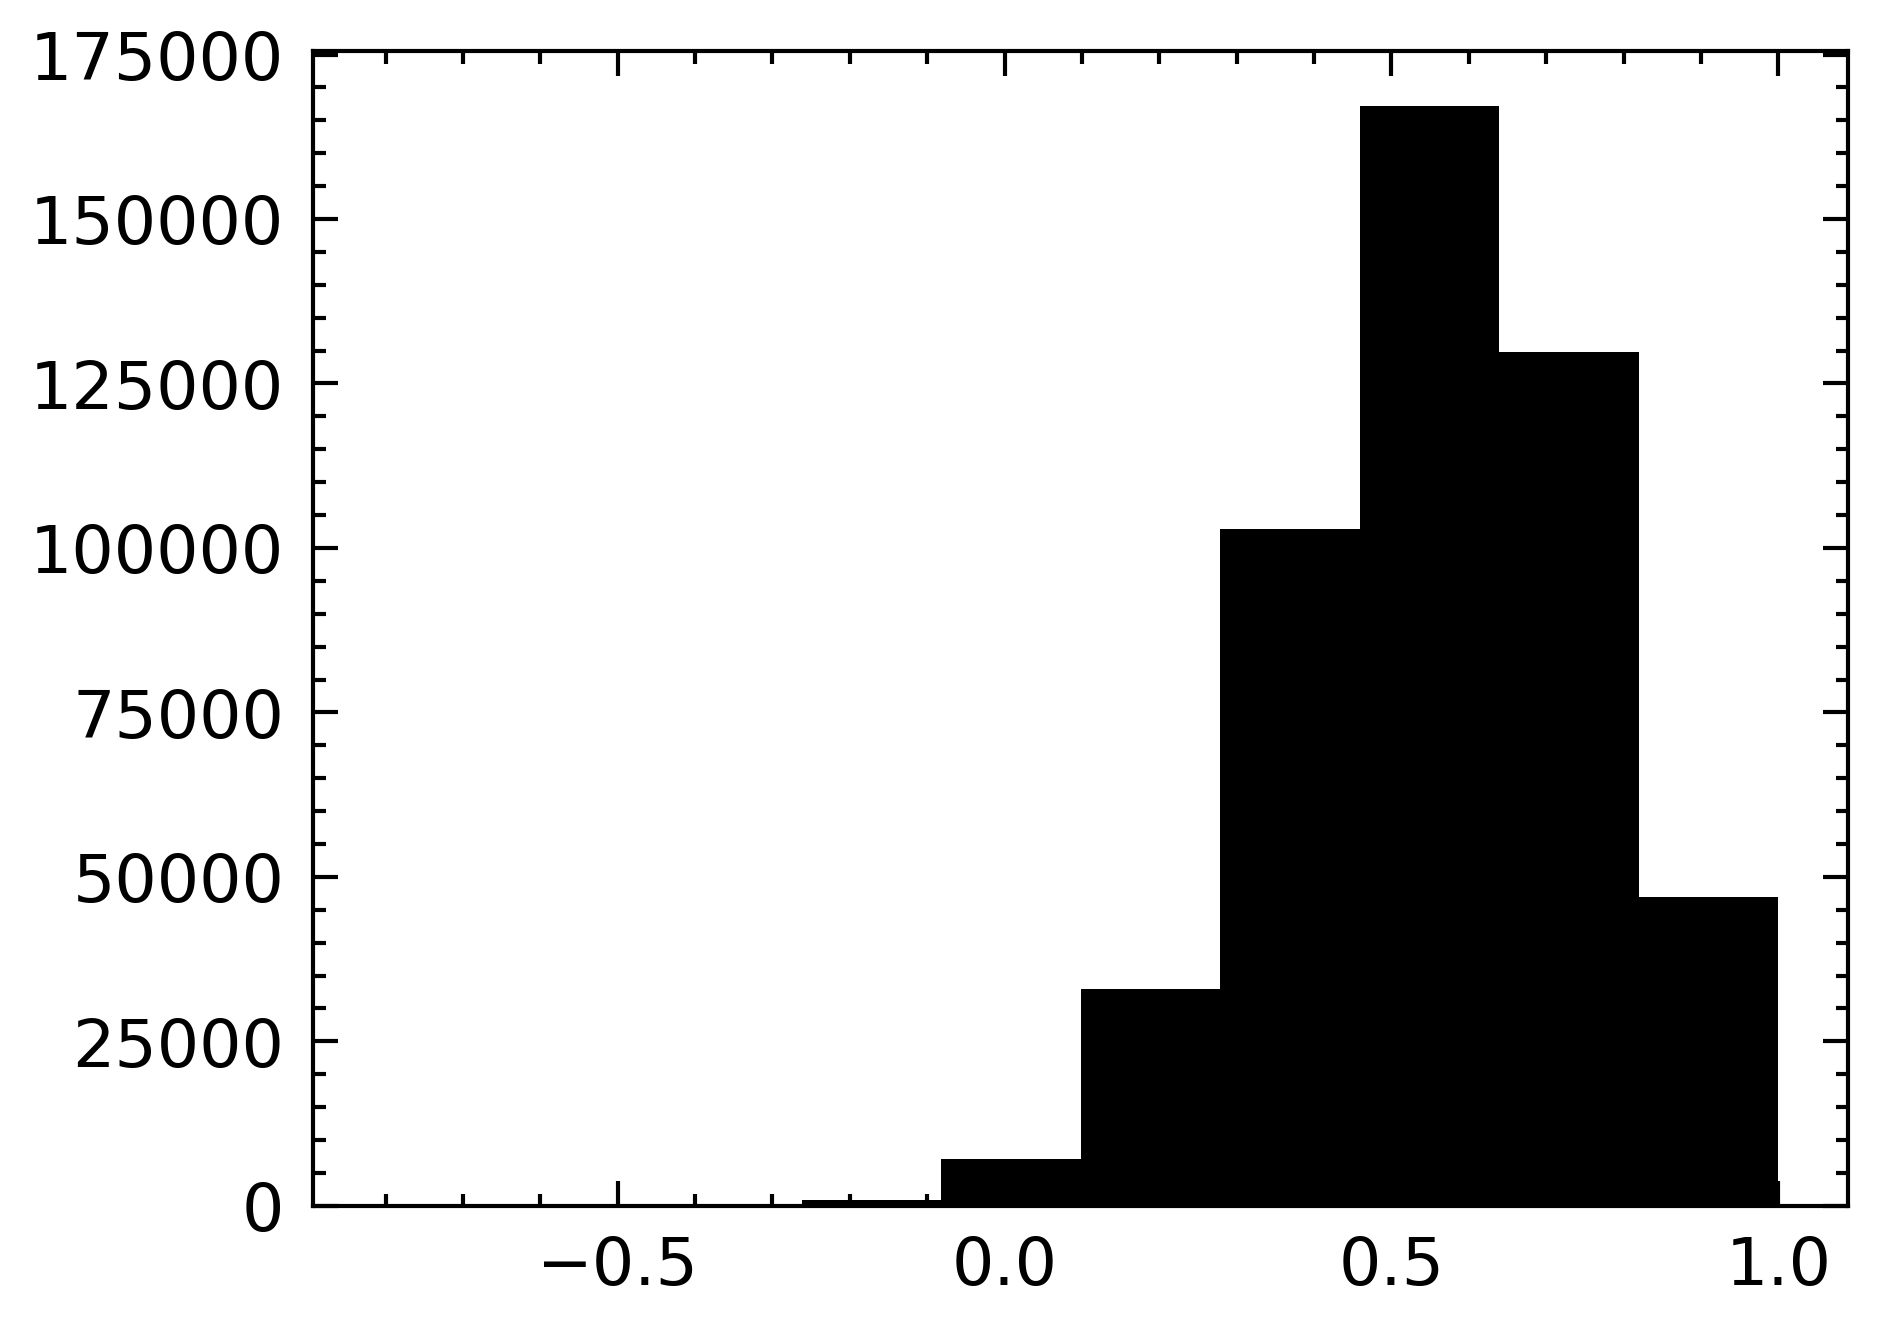

In [73]:
plt.hist(KMDCMoto)

In [101]:
swm4rdf = np.array([7.16341663e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.41697233e-04, 7.52759981e-02, 1.30337975e+00, 3.29939227e+00,
       3.08678369e+00, 1.96769843e+00, 1.25315677e+00, 9.51164933e-01,
       8.50590736e-01, 8.25633232e-01, 8.30578199e-01, 8.41809208e-01,
       8.61533248e-01, 8.80387979e-01, 9.05899569e-01, 9.30542129e-01,
       9.58309860e-01, 9.90668668e-01, 1.01893455e+00, 1.04524510e+00,
       1.06946187e+00, 1.08184127e+00, 1.08855056e+00, 1.08425055e+00,
       1.07627620e+00, 1.05957490e+00, 1.03969664e+00, 1.01702432e+00,
       9.92562887e-01, 9.70059732e-01, 9.45174982e-01, 9.25409497e-01,
       9.14546883e-01, 9.13179446e-01, 9.21926208e-01, 9.37230818e-01,
       9.52526558e-01, 9.70569722e-01, 9.84248112e-01, 9.99074040e-01,
       1.01081851e+00, 1.02067069e+00, 1.02899028e+00, 1.03539087e+00,
       1.03987727e+00, 1.04015494e+00, 1.03929983e+00, 1.03521371e+00,
       1.02887433e+00, 1.02241535e+00, 1.01366072e+00, 1.00636374e+00,
       9.97925607e-01, 9.92302310e-01, 9.88078861e-01, 9.83807351e-01,
       9.83215181e-01, 9.83305605e-01, 9.85661562e-01, 9.87582394e-01,
       9.90971000e-01, 9.93662546e-01, 9.96562430e-01, 9.98179958e-01,
       1.00027287e+00, 1.00176552e+00, 1.00193629e+00, 1.00304571e+00,
       1.00218048e+00, 1.00261476e+00, 1.00181448e+00, 1.00106676e+00,
       1.00129930e+00, 1.00114879e+00, 9.99630032e-01, 9.99385074e-01])

(0.0, 3.5)

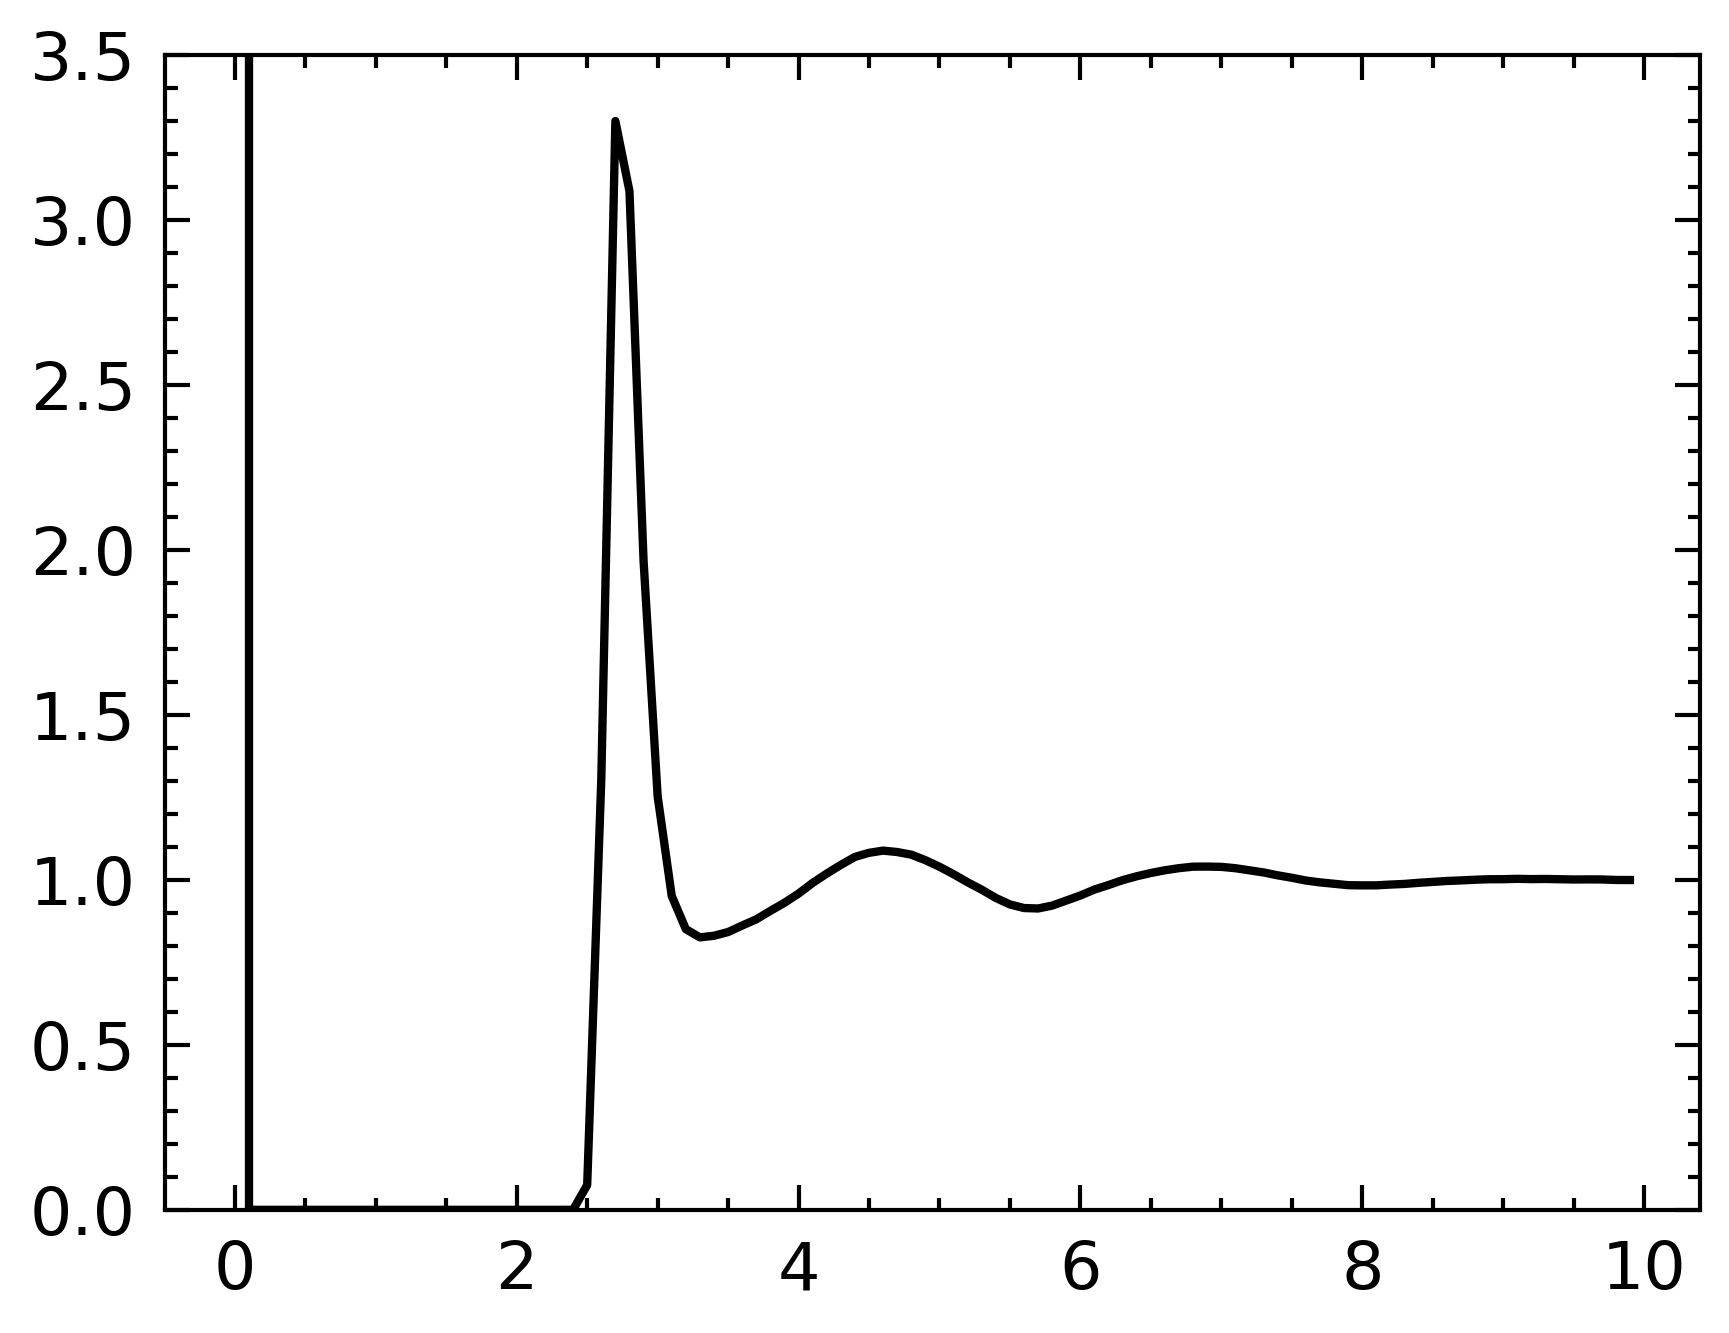

In [110]:
plt.plot(np.arange(100)/10, swm4rdf)
plt.ylim(0, 3.5)
# plt.xlim(0, 8)

In [443]:
def rdfplot(ax, FONTSIZE=FONTSIZE):
    ccdata = "/home/boittier/pcbach/waterlj/ccsdt_small_param_72_test2/dcd/multiplot.dat"
    ccdatax = []
    ccdatay = []
    with open(ccdata  ) as f:
        for _ in f.readlines()[:-1]:
            spl = _.split(" ")
            ccdatax.append(float(spl[0]))
            ccdatay.append(float(spl[1]))
            
    base = Path("/home/boittier/pcbach/waterlj/kjobbayes2-60-90f853cc-20b2-4fd7-a03c-5ba324966ea7")
    x = []
    y = []
    with open(base / "multiplot.dat") as f:
        for _ in f.readlines()[:-1]:
            spl = _.split(" ")
            x.append(float(spl[0]))
            y.append(float(spl[1]))

    ax.plot(x,y, color="k", label="M-DFT")
    ax.plot(ccdatax, ccdatay, color="k", linestyle="--", label = "M-CC")

    ax.plot(*Sresults.T, label="TIP3", alpha=1, 
            color="b", linestyle="-", linewidth=1)

    plot_rdf_exp(ax)

    ax.set_xlim(2, 8)
    ax.set_ylim(0, 3.5)


    ax.plot(np.arange(100)/10, swm4rdf, c="r", label="SWM4")
    ax.set_ylabel("$g(r)$", fontsize=FONTSIZE)
    ax.set_xlabel("$r~[\mathrm{Å}]$", fontsize=FONTSIZE)

    plt.legend()
    return ax

In [356]:
from MDAnalysis.analysis import rdf
water_rdf_1 = """2.4615076480275357 0.059468174017968334
2.512692313398513 0.3882072509136556
2.5574974407667312 1.423799138515099
2.5603163063958574 1.1114688268079047
2.589246769431628 1.9059735224445984
2.602945467313522 2.388157797130691
2.6548719394290066 2.6347046867350117
2.6890939572422585 2.8429051130266214
2.7816714389567228 2.5853201390640375
2.801551859709508 2.3825695196554055
2.8774634165640496 1.9715690201721972
2.9164824513251135 1.6482599686463002
2.992047831698885 1.2756158232323962
3.1762631732514377 0.8645559792096273
3.4116631801749673 0.7822352120825458
3.717534827826654 0.8916566522756137
4.0769154686487745 1.072281649184752
4.563787961960149 1.1268093902843077
5.197439283117961 0.9182430059987414
5.504695636692729 0.874239029914591
6.099575192004312 0.9615843013911327
6.658353485749892 1.0489493543808615
7.2905706472016565 0.9992878655252708
7.88648873195555 0.971564074793899
8.698618755841729 0.9875574282054682
9.330341379463821 0.992690730877456
10.449431034226963 0.9975569831214215
11.31596021937698 0.9861232684994214
"""

water_rdf_2 = """2.412776412776413 0.03828650785172538
2.515970515970516 0.438436064523021
2.5454545454545454 1.142826621087491
2.633906633906634 1.9951287255635082
2.751842751842752 2.482256169212691
2.86977886977887 2.065035786774917
2.9729729729729732 1.4999679521418652
3.194103194103194 0.9437666915927785
3.385749385749386 0.8483922657835701
3.8574938574938575 0.9882063882063881
4.211302211302211 1.0582843713278498
4.535626535626536 1.0500587544065805
4.88943488943489 1.0157889114410854
5.213759213759214 0.9988676423459031
5.523341523341523 0.9471423993163122
5.803439803439803 0.9388526866787736
6.083538083538084 0.9653455827368871
6.378378378378379 1.0179468005554961
6.658476658476658 1.0444396966136096
6.968058968058967 1.036192714453584
7.616707616707616 1.0110458284371329
8.132678132678132 1.0030979596196985
8.737100737100738 1.0039739344087169
9.533169533169533 0.9964320051276572
9.93120393120393 1.01440017092191
"""


def plot_rdf_exp(ax, shift=0, c="k", lw=0.5, linestyle="--", marker="o"):
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_1.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        "-",
        fillstyle="none",
        marker=marker,
        c=c,
        alpha=0.5,
        label="[Hura, 2003]",
        linewidth=lw,
    )
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_2.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        linestyle,
        fillstyle="none",
        c=c,
        alpha=0.5,
        marker=marker,
        label="[Soper, 2007]",
        linewidth=lw,
    )
    return ax

In [361]:
base

PosixPath('/home/boittier/pcbach/waterlj/kjobbayes2-60-90f853cc-20b2-4fd7-a03c-5ba324966ea7')

In [360]:
temperatures = np.arange(230.0, 380.0, 10.0)
import seaborn as sns
# from ff_energy.simulations import charmm, plots

#  matplotlib styles
plt.style.use(["science", "no-latex", "ieee"])
all_rdfs = []
# ureg = pint.UnitRegistry()
# colors = sns.cubehelix_palette(start=.5, rot=-.5)
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i in temperatures[::3]:
    dcdpath = base / f"dcd/water.2000.{i}.dyna2.2.dcd"
    u = mda.Universe(psfpath, dcdpath)
    rdf = mda.analysis.rdf.InterRDF(u.select_atoms("type OT"), 
                                    u.select_atoms("type OT"),
                                    nbins=100, range=(1,10), verbose=True)
    rdf.run()
    all_rdfs.append(rdf)
    c += 1

OSError: DCD file does not exist

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Text(0.5, 0, 'r $[\\mathrm{Å}]$')

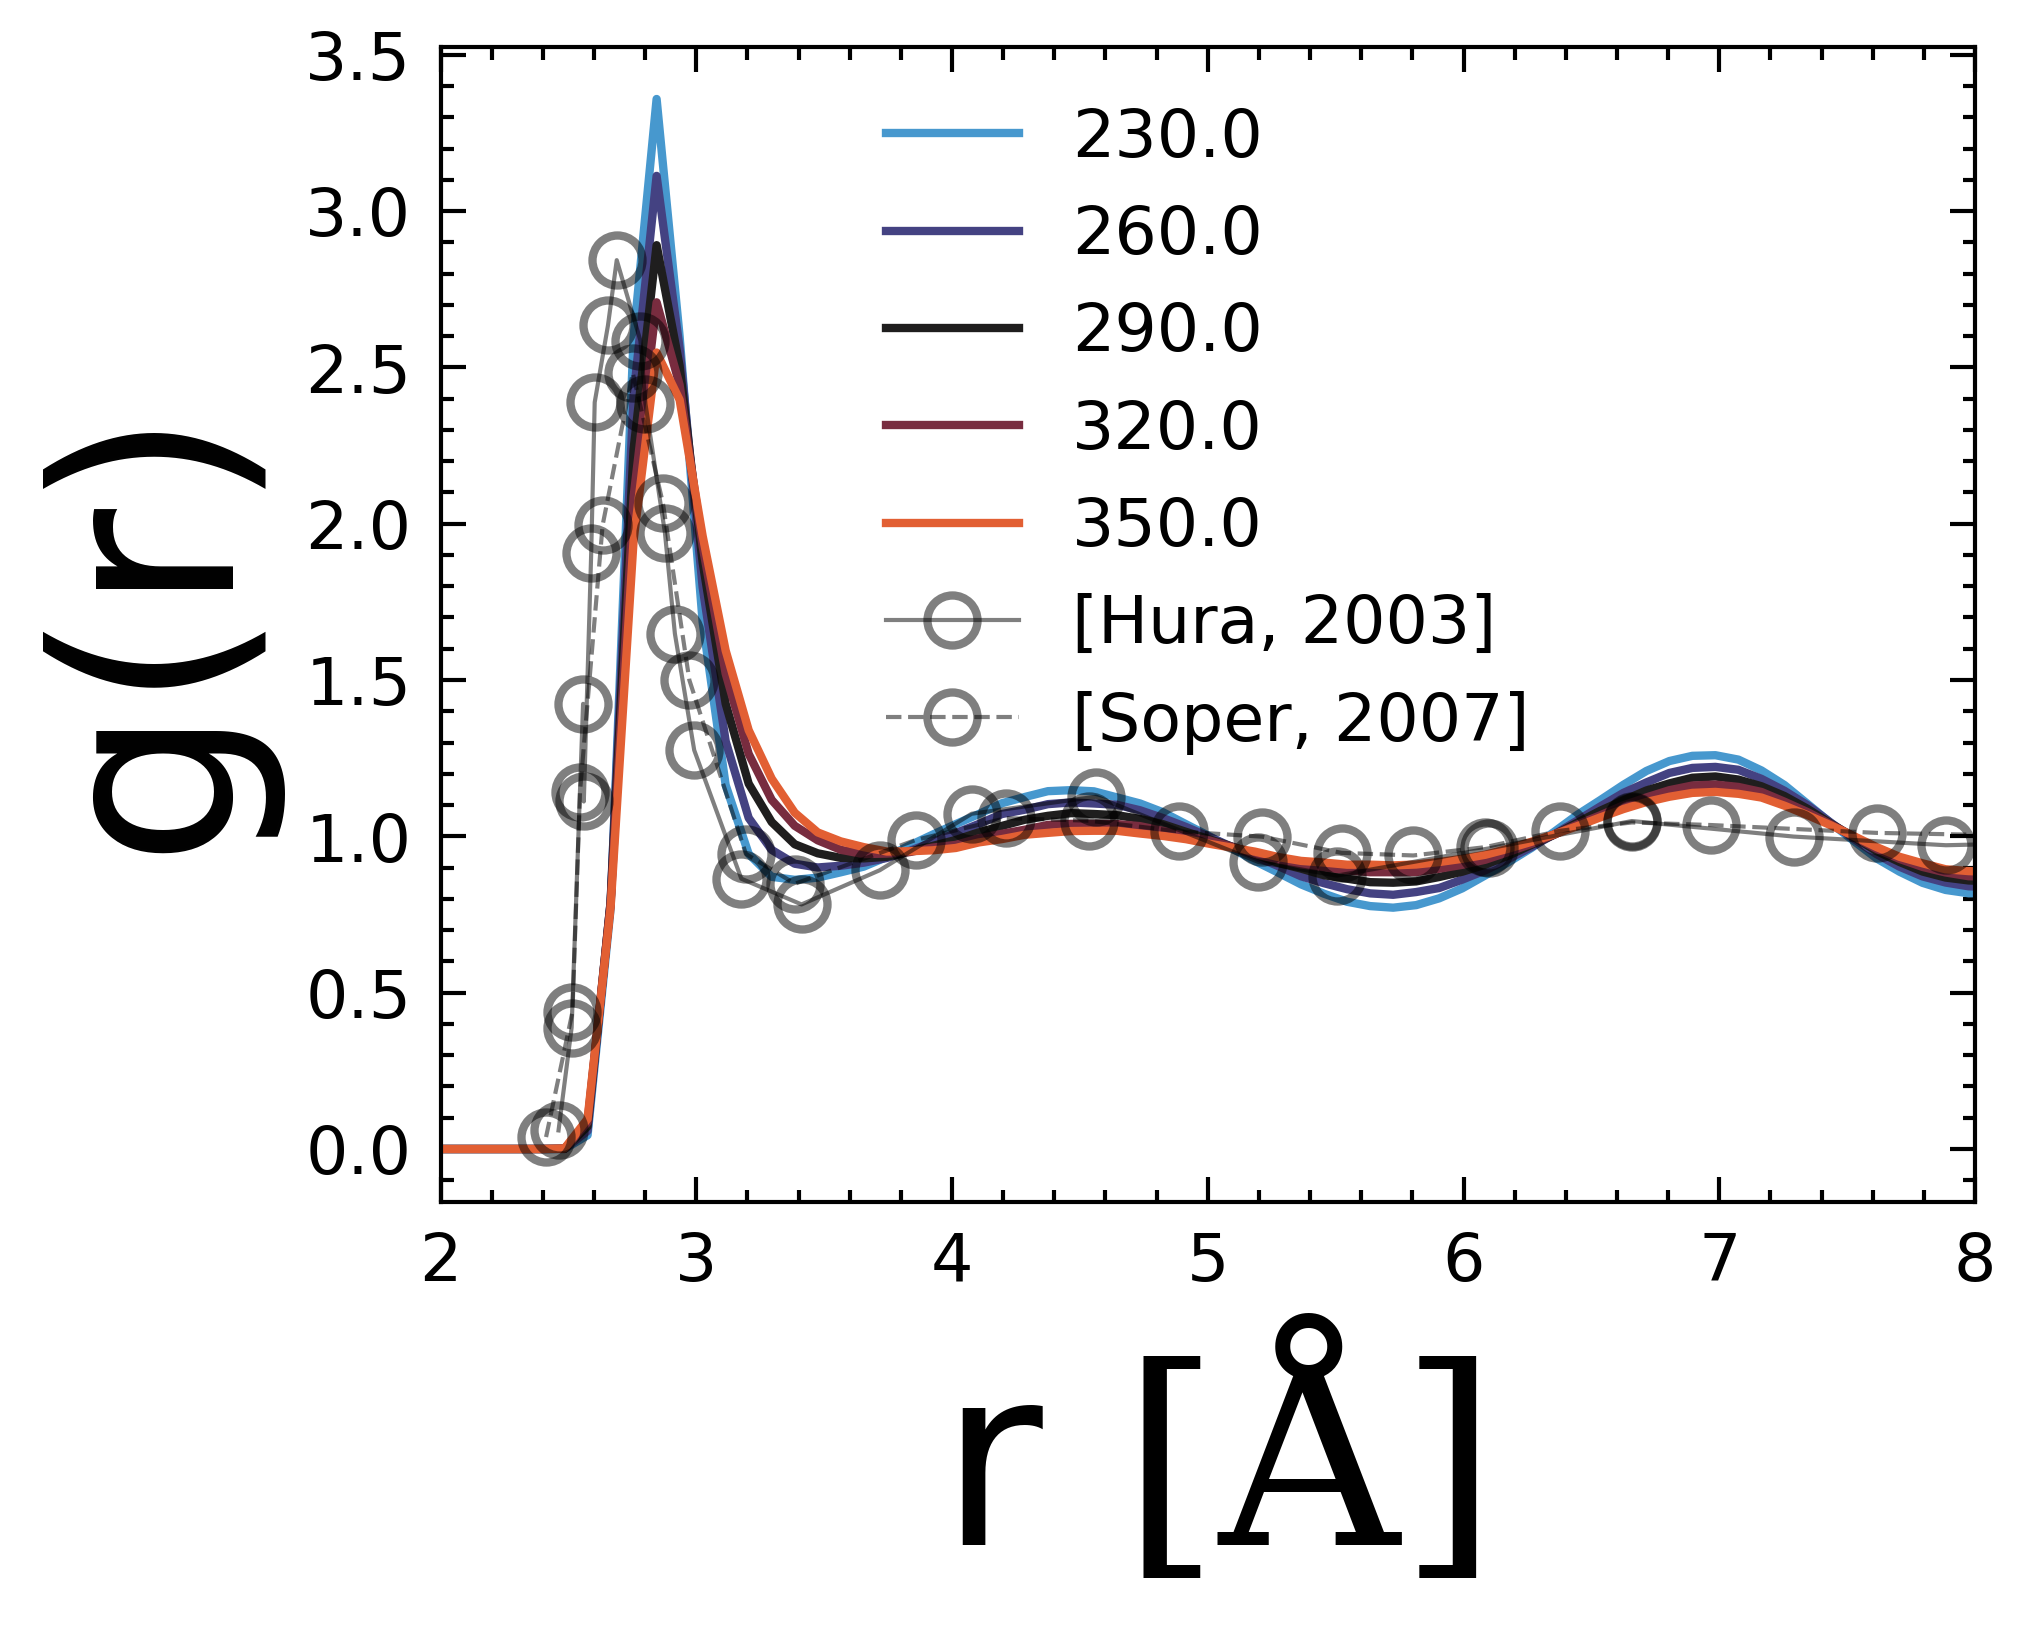

In [395]:
FONTSIZE = 30
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i, T in enumerate(temperatures[::3]):
    rdf = all_rdfs[c]
    # all_rdfs.append(rdf)
    plt.plot(rdf.bins, rdf.rdf, "-", label=T, color=colors[c])
    c += 1
    
ax = plt.gca()
plot_rdf_exp(ax, shift=0, c="k", lw=0.5, 
             linestyle="--", marker="o")
plt.xlim(2,8)
plt.legend()
ax.set_ylabel("g(r)", fontsize=FONTSIZE)
ax.set_xlabel("r $[\mathrm{Å}]$", fontsize=FONTSIZE)

In [337]:
from io import StringIO
import pandas as pd

data = StringIO("""t,k,ku,h,p,pu,pe
230.0,32.2687733831091,1.0097470815757863,10.460780978306985,1.0460636806334338,0.049373680633433836,4.719949803011617
240.0,27.980790489857412,0.914504522449735,10.257805792023916,1.0400758778822263,0.043385877882226365,4.1714146827986704
250.0,32.74782262824852,0.9145034924351712,10.069492874911921,1.03463950218351,0.03794950218351001,3.6678961226031994
260.0,35.52446881035339,0.959581904378092,9.875059496870458,1.0283035944053194,0.03161359440531941,3.0743444423727744
270.0,33.5910306779362,0.9197065757772551,9.676577798856403,1.0218701052505783,0.025180105250578344,2.464119962135872
280.0,33.56246587417001,0.8821707066327323,9.486593534033243,1.0161553172271982,0.019465317227198242,1.9155848419229466
290.0,34.458814093975484,0.9765254066232922,9.295391760650382,1.0095143399952518,0.012824339995251788,1.2703474816724354
300.0,35.24296689825374,0.9088661016548765,9.102187564053342,1.0027745354641333,0.006084535464133345,0.6067700414148554
310.0,39.647707715267366,0.9843493146160269,8.913853205739935,0.9955269310744544,-0.0011630689255455184,-0.11682947886605528
320.0,39.029786246353645,0.9726612051882383,8.723359102011703,0.987958636166438,-0.00873136383356199,-0.8837782791638097
330.0,41.058631921989104,0.9786057431781409,8.533717448566044,0.9796208176779057,-0.017069182322094312,-1.7424274794971306
340.0,42.61517100336455,1.132538569056568,8.345762859925799,0.9711700483666186,-0.025519951633381388,-2.6277531598408146
350.0,44.930502109381116,1.1595015334780618,8.159602840613994,0.9623678084446904,-0.03432219155530958,-3.566431800205229
360.0,48.58853659954588,1.241853492093496,7.973647452925818,0.9534042703809961,-0.0432857296190039,-4.54012332058322
370.0,52.46740242867495,1.465029906955732,7.782717090329838,0.9436369559141095,-0.05305304408589051,-5.622188041003286"""
               )

df = pd.read_csv(data)


In [338]:
df 

t          k        ku          h         p        pu        pe
0   230.0  32.268773  1.009747  10.460781  1.046064  0.049374  4.719950
1   240.0  27.980790  0.914505  10.257806  1.040076  0.043386  4.171415
2   250.0  32.747823  0.914503  10.069493  1.034640  0.037950  3.667896
3   260.0  35.524469  0.959582   9.875059  1.028304  0.031614  3.074344
4   270.0  33.591031  0.919707   9.676578  1.021870  0.025180  2.464120
5   280.0  33.562466  0.882171   9.486594  1.016155  0.019465  1.915585
6   290.0  34.458814  0.976525   9.295392  1.009514  0.012824  1.270347
7   300.0  35.242967  0.908866   9.102188  1.002775  0.006085  0.606770
8   310.0  39.647708  0.984349   8.913853  0.995527 -0.001163 -0.116829
9   320.0  39.029786  0.972661   8.723359  0.987959 -0.008731 -0.883778
10  330.0  41.058632  0.978606   8.533717  0.979621 -0.017069 -1.742427
11  340.0  42.615171  1.132539   8.345763  0.971170 -0.025520 -2.627753
12  350.0  44.930502  1.159502   8.159603  0.962368 -0.034322 -3.566432
13  360.0  48.588537  1.241853   7.973647  0.953404 -0.043286 -4.540123
14  370.0  52.467402  1.465030   7.782717  0.943637 -0.053053 -5.622188

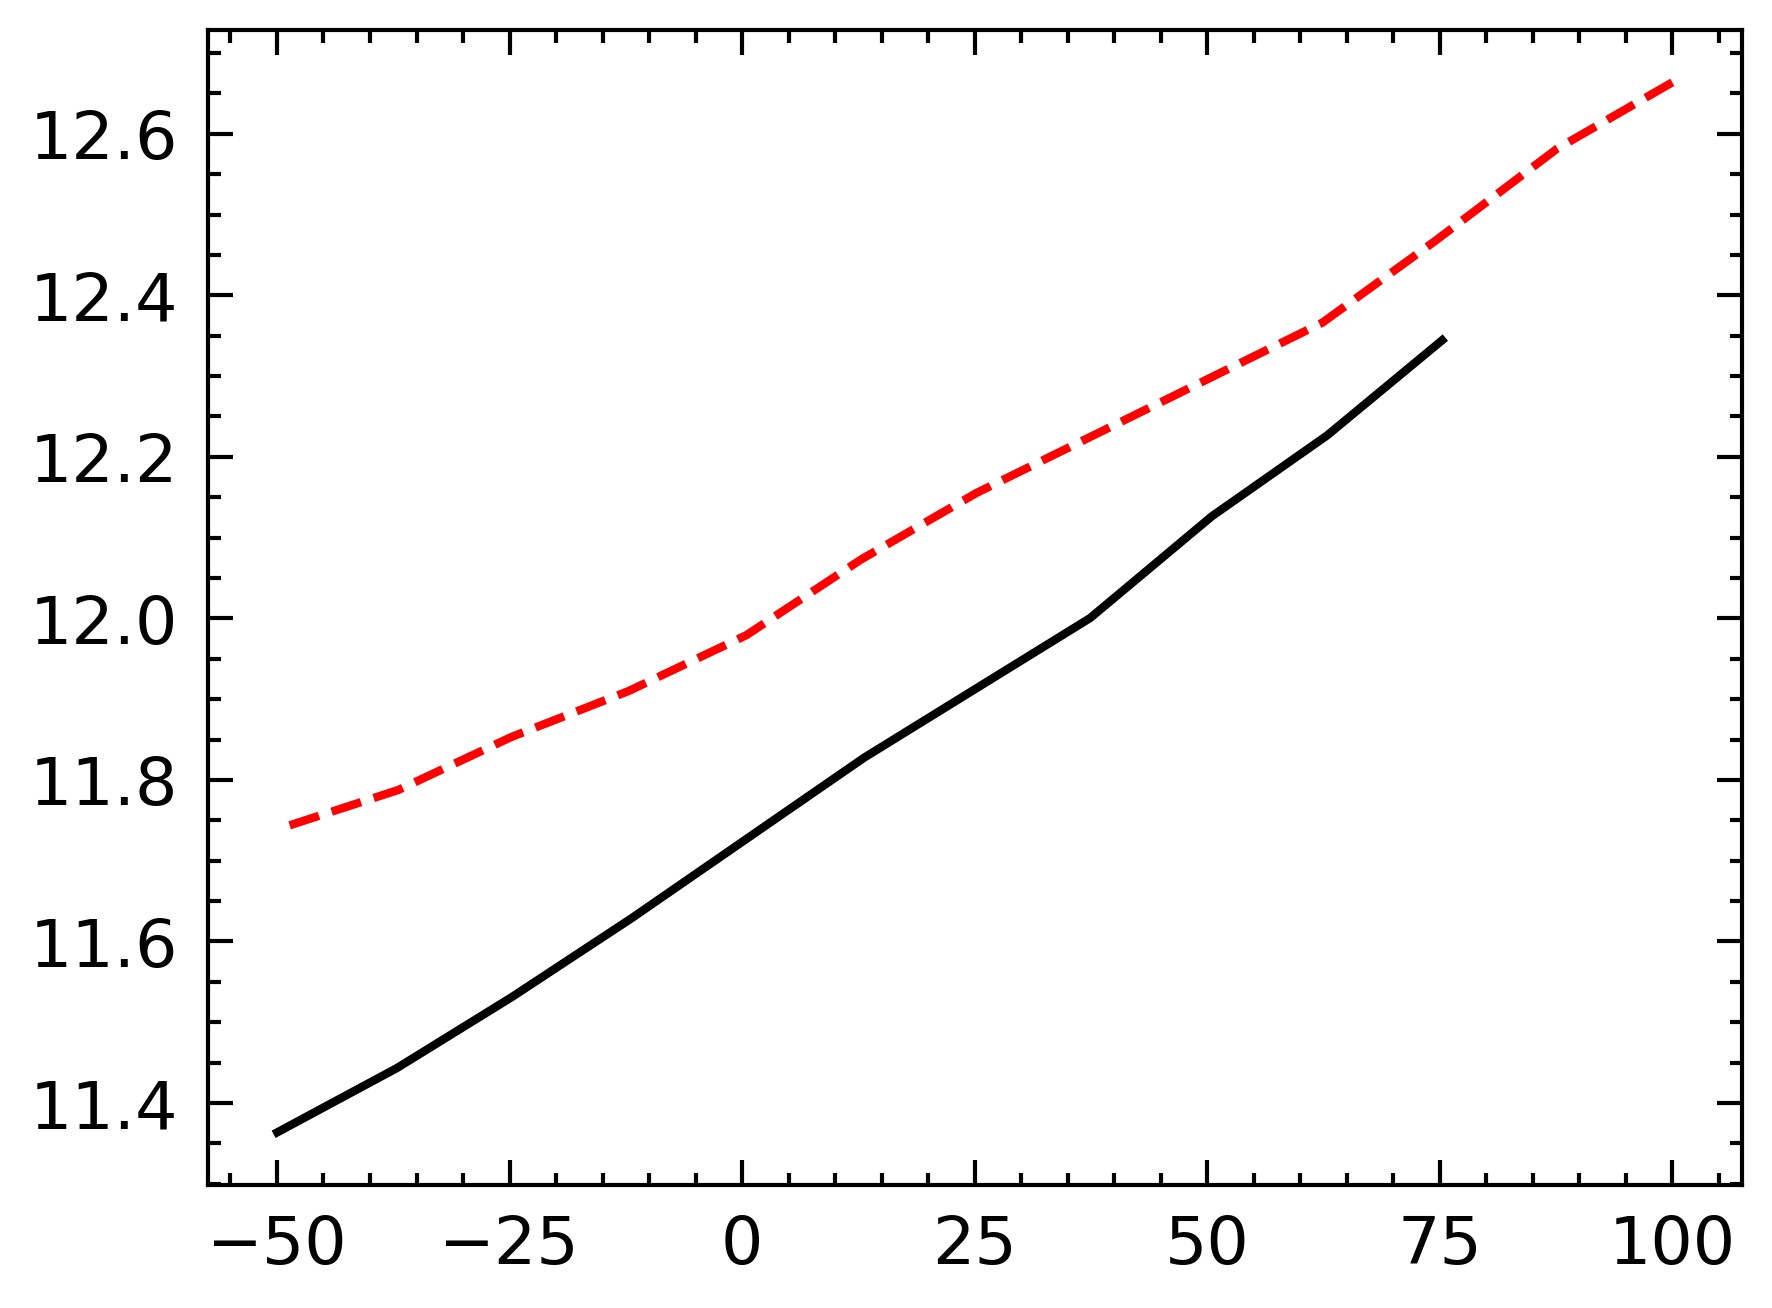

In [226]:
dhexp = """-49.96713013180817, 11.363584568692547
-37.11775082448585, 11.44308582322585
-24.729919249690475, 11.531242809716334
-11.884648675892137, 11.62862527254599
13.11562523967612, 11.8274331919929
37.43247981242263, 12.000482091400148
50.500991574357144, 12.126318903461197
62.88608399346987, 12.226396695482585
75.26706767905861, 12.344355695800328
87.659007987378, 12.414631473994456
99.80990259562392, 12.533938138908063
100.00986096045759, 12.663719335152134
87.62065980782086, 12.581522751427102
74.5494088902037, 12.467606744896953
62.39440554843375, 12.366181288279702
50.00246524011439, 12.295905510085571
37.61052493179503, 12.225629731891441
25.218584623475664, 12.155353953697313
12.829383470838962, 12.07315736997228
0.4429214738848941, 11.979039980716344
-12.179107911777265, 11.91011186711808
-24.803876453122086, 11.853104559050719
-36.967097261939976, 11.787441519026176
-49.36451588162464, 11.741007351893852"""
dhexp = pd.read_csv(StringIO(dhexp), header=None).to_numpy()
plt.plot(*dhexp[:9].T)
plt.plot(*dhexp[11:].T)

In [272]:
h, 0.9*(-T*0.02+15.123)

(0     10.460781
 1     10.257806
 2     10.069493
 3      9.875059
 4      9.676578
 5      9.486594
 6      9.295392
 7      9.102188
 8      8.913853
 9      8.723359
 10     8.533717
 11     8.345763
 12     8.159603
 13     7.973647
 14     7.782717
 Name: h, dtype: float64,
 0     9.4707
 1     9.2907
 2     9.1107
 3     8.9307
 4     8.7507
 5     8.5707
 6     8.3907
 7     8.2107
 8     8.0307
 9     7.8507
 10    7.6707
 11    7.4907
 12    7.3107
 13    7.1307
 14    6.9507
 Name: t, dtype: float64)

In [303]:
from io import StringIO
import pandas as pd

data = StringIO("""-37.5,TIP5P-E 512,0.973,12.03,19,12,18,
-37.5,TIP5P 512,0.9725,12.084,,,,
-25.0,TIP5P-E 512,0.980,11.67,22,11,29,
-25.0,TIP5P 512,0.9814,11.823,43.0,-125,17,
-12.5,TIP5P-E 512,0.995,11.27,32,-50,48,
-12.5,TIP5P-E 256,0.994,11.26,42,-107,55,
-12.5,TIP5P 512,0.9979,11.367,39.4,-105,24,
0.0,TIP5P-E 512,1.003,10.924,31,-18,52,95
0.0,TIP5P-E 256,1.0004,10.911,33,-31,57,99
0.0,TIP5P 512,1.007,11.041,33.8,-32,31,92
12.5,TIP5P-E 512,1.0039,10.633,29,18,53,90
12.5,TIP5P-E 256,1.002,10.625,30.1,21,57,92
12.5,TIP5P 512,1.005,10.610,33,33,51,78
25.0,TIP5P-E 512,1.0000,10.377,27.2,49,52,92
25.0,TIP5P-E 256,0.998,10.359,28.3,60,61,86
25.0,TIP5P 512,0.999,10.46,29.1,63,41,82
37.5,TIP5P-E 512,0.9926,10.133,26.6,69,58,80
37.5,TIP5P-E 256,0.991,10.116,27.4,87,66,85
37.5,TIP5P 512,0.989,10.207,27.6,87,47,
50.0,TIP5P-E 512,0.9827,9.910,25.5,91,60,77
50.0,TIP5P-E 256,0.9797,9.889,26.9,120,75,83
50.0,TIP5P 512,0.978,9.967,27,92,56,75
62.5,TIP5P-E 512,0.9714,9.697,24.9,106,64,80
62.5,TIP5P 512,0.967,9.744,25.9,110,59,
75.0,TIP5P-E 512,0.9586,9.493,24,118,67,72
75.0,TIP5P 512,0.9512,9.519,25.9,127,65,69""")
df = pd.read_csv(data, header=None)
tip5pe512 = df[df[1]=="TIP5P-E 512"]
tip5pe256 = df[df[1]=="TIP5P-E 256"]
tip5p512 = df[df[1]=="TIP5P 512"]
tip5p256 = df[df[1]=="TIP5P 256"]
df

0            1       2       3     4      5     6     7
0  -37.5  TIP5P-E 512  0.9730  12.030  19.0   12.0  18.0   NaN
1  -37.5    TIP5P 512  0.9725  12.084   NaN    NaN   NaN   NaN
2  -25.0  TIP5P-E 512  0.9800  11.670  22.0   11.0  29.0   NaN
3  -25.0    TIP5P 512  0.9814  11.823  43.0 -125.0  17.0   NaN
4  -12.5  TIP5P-E 512  0.9950  11.270  32.0  -50.0  48.0   NaN
5  -12.5  TIP5P-E 256  0.9940  11.260  42.0 -107.0  55.0   NaN
6  -12.5    TIP5P 512  0.9979  11.367  39.4 -105.0  24.0   NaN
7    0.0  TIP5P-E 512  1.0030  10.924  31.0  -18.0  52.0  95.0
8    0.0  TIP5P-E 256  1.0004  10.911  33.0  -31.0  57.0  99.0
9    0.0    TIP5P 512  1.0070  11.041  33.8  -32.0  31.0  92.0
10  12.5  TIP5P-E 512  1.0039  10.633  29.0   18.0  53.0  90.0
11  12.5  TIP5P-E 256  1.0020  10.625  30.1   21.0  57.0  92.0
12  12.5    TIP5P 512  1.0050  10.610  33.0   33.0  51.0  78.0
13  25.0  TIP5P-E 512  1.0000  10.377  27.2   49.0  52.0  92.0
14  25.0  TIP5P-E 256  0.9980  10.359  28.3   60.0  61.0  86.0
15  25.0    TIP5P 512  0.9990  10.460  29.1   63.0  41.0  82.0
16  37.5  TIP5P-E 512  0.9926  10.133  26.6   69.0  58.0  80.0
17  37.5  TIP5P-E 256  0.9910  10.116  27.4   87.0  66.0  85.0
18  37.5    TIP5P 512  0.9890  10.207  27.6   87.0  47.0   NaN
19  50.0  TIP5P-E 512  0.9827   9.910  25.5   91.0  60.0  77.0
20  50.0  TIP5P-E 256  0.9797   9.889  26.9  120.0  75.0  83.0
21  50.0    TIP5P 512  0.9780   9.967  27.0   92.0  56.0  75.0
22  62.5  TIP5P-E 512  0.9714   9.697  24.9  106.0  64.0  80.0
23  62.5    TIP5P 512  0.9670   9.744  25.9  110.0  59.0   NaN
24  75.0  TIP5P-E 512  0.9586   9.493  24.0  118.0  67.0  72.0
25  75.0    TIP5P 512  0.9512   9.519  25.9  127.0  65.0  69.0

In [302]:
# test_array.reshape(7,7)

In [421]:
def plotH(ax):
    T = df["t"]
    k = df["k"]
    h=df["h"]
    rho=df["p"]
    dHExp = np.array([[273.15, 10.75],
    [283.15, 10.52],
    [293.15, 10.35],
    [303.15, 10.16],
    [313.15, 10.00],
    [323.15, 9.82],
    [333.15, 9.64],
    [343.15, 9.46],
    [353.15, 9.29],
    [363.15, 9.12],
    [373.15, 9.71],
    [383.15, 8.78],
    [393.15, 8.62],
    [403.15, 8.45],
    [413.15, 8.29],
    [423.15, 8.12]])

    dHExp2 = np.array([[0.01, 45054],
    [2	, 44970	],
    [4	, 44883	],
    [10	, 44627	],
    [14	, 44456	],
    [18	, 44287	],
    [20	, 44200	],
    [25	, 43988	],
    [30	, 43774	],
    [34	, 43602	],
    [40	, 43345	],
    [44	, 43172	],
    [50	, 42911	],
    [54	, 42738	],
    [60	, 42475	],
    [70	, 42030	],
    [80	, 41579	],
    [90	, 41120	],
    [96	, 40839	],
    [100	, 40650	],
    [110	, 40167	],
    [120	, 39671	],
    [140	, 38630	],
    [160	, 37508	],
    [180	, 36286	],
    [200	, 34944	],
    [220	, 33462	],
    [240	, 31804	],
    [260	, 29934	],
    [280	, 27798	],
    [300	, 25304	],
    [320	, 22310	],
    [340	, 18507	],
    [360	, 12967	],])

    # plt.plot(*dHExp.T)

    x,y = (dHExp2.T).copy()
    x += 273.15
    y /= 4184
    ax.plot(x,y, label="Exp.")
    ax.plot(T,h+1.123,linestyle="-", marker="h", 
             linewidth=4,
                 color="blue", alpha=0.5,label="M-DFT")


    ax.plot(dhexp[:9].T[0]+270, dhexp[:9].T[1][::-1]-1.4, marker="s", 
            linestyle="-", color="black", alpha=0.2, 
            # label="TIP4P",
           )
    ax.plot(dhexp[11:].T[0]+270, dhexp[11:].T[1][::-1]-1., 
            marker="^", linestyle="-", color="black", alpha=0.2, 
            # label="TIP3P",
           )


    ax.plot(tip5p512[0]+270, tip5p512[3], marker="p", linestyle="-", 
            color="black", alpha=0.2, 
            # label="TIP5",
           )
    ax.plot(tip5pe512[0]+270, tip5pe512[3], marker="p", linestyle="--", 
            color="black", alpha=0.4, 
            # label="TIP5/E",
           )


    ax.axvline(300, alpha=0.1, linestyle="--")
    ax.set_xlim(240,360)
    ax.set_ylim(8,12)
    ax.set_ylabel("$\Delta$H (vap.) [g/cm$^3$]")
    ax.set_xlabel("Temperature [K]")
    ax.fill_between([225,273],[0,0], [15,15],color="gray", alpha=0.1)

    # plt.legend(fontsize=5)

In [417]:
# # plt.errorbar(T,rho,yerr=rho_unc, color="blue", label="KerNN-kMDCM (13.5 Å)")
# plt.errorbar(T,rho2,yerr=rho_unc2, linestyle="-", marker="h", 
#              color="blue", alpha=0.5,label="KerNN-kMDCM")
# # plt.errorbar(T,(rho+rho2)/2,yerr=(rho_unc+rho_unc2)/2, color="blue", label="KerNN-kMDCM")

# plt.plot(temperature_exp+273.15,density_exp, color="k", label="Exp. 1")
# plt.plot(cT+273.15,cD,  color="k", label="Exp. 2")
# plt.ylim(0.940, 1.04)
# plt.xlim(240,365)
# plt.ylabel("Density [g/cm$^3$]")
# plt.xlabel("Temperature [K]")

# # Data extracted manually from the image based on estimated values
# # Temperature values for all data points (x-axis)
# temperature = np.array([273, 283, 293, 303, 313, 323, 333, 343, 353, 363, 373])

# # Density values (y-axis) for each model based on rough estimation from the image
# # Experimental data
# exp_density = np.array([999, 999, 998, 997, 995, 993, 990, 987, 983, 978, 972])/1000

# # SPC model
# spc_density = np.array([999, 997, 995, 993, 990, 986, 981, 975, 969, 961, 952])/1000

# # SPCE model
# spce_density = np.array([998, 996, 993, 990, 986, 981, 976, 970, 963, 955, 946])/1000

# # TIP3P model
# tip3p_density = np.array([995, 993, 990, 986, 981, 975, 968, 961, 953, 944, 933])/1000

# # TIP4P model
# tip4p_density = np.array([996, 993, 989, 984, 979, 973, 966, 958, 950, 940, 930])/1000

# # TIP5P model
# tip5p_density = np.array([992, 988, 982, 976, 970, 962, 954, 945, 936, 925, 914])/1000

# # TIP4PEw model
# tip4pew_density = np.array([997, 995, 991, 986, 981, 975, 968, 960, 951, 941, 930])/1000

# # plt.plot(temperature, spc_density, label="SPC",
# #          marker="o", linestyle="-", color="black", alpha=0.15)
# # plt.plot(temperature, spce_density, label="SPCE", 
# #          marker="s", linestyle="-", color="black", alpha=0.15)
# plt.plot(temperature, tip3p_density, label="TIP3P", 
#          marker="^", linestyle="-", color="black", alpha=0.15)
# plt.plot(temperature, tip4p_density, label="TIP4P", 
#          marker="d", linestyle="-", color="black", alpha=0.15)
# plt.plot(temperature, tip5p_density, label="TIP5P", 
#          marker="p", linestyle="--", color="black", alpha=0.15)
# # plt.plot(temperature, tip4pew_density, label="TIP4PEw", 
# #          marker="^", linestyle="--", color="black", alpha=0.15)

# plt.fill_between([225,273],[0,0], [15,15],color="gray", alpha=0.1)

# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [347]:
Tc_rho = np.array([[0.1,       	0.9998495],
[1,       	0.9999017],
[4,       	0.9999749],
[10,       	0.9997000],
[15,       	0.9991026],
[20,       	0.9982067],
[25,       	0.9970470],
[30,       	0.9956488],
[35,       	0.9940326],
[40,       	0.9922152],
[45,       	0.99021	],
[50,       	0.98804	],
[55,       	0.98569	],
[60,       	0.98320	],
[65,       	0.98055	],
[70,       	0.97776	],
[75,       	0.97484	],
[80,       	0.97179	],
[85,       	0.96861	],
[90,       	0.96531	],
[95,       	0.96189	],
[100,       	0.95835	],
# [110,       	0.95095	],
# [120,       	0.94311	],
# [140,       	0.92613	],
# [160,       	0.90745	],
# [180,       	0.88700	],
# [200,       	0.86466	],
# [220,       	0.84022	],
# [240,       	0.81337	],
# [260,       	0.78363	],
# [280,       	0.75028	],
# [300,       	0.71214	],
# [320,       	0.66709	],
# [340,       	0.61067	],
# [360,       	0.52759	],
# [373.946, 	0.3220]
                  ]                 )
temperature_exp,density_exp = Tc_rho.T
temperature_expt = [
    240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360
]
density_expt = [
    0.977, 0.984, 0.992, 0.996, 1.000, 1.002, 1.000, 0.997, 0.993, 0.987, 0.980, 0.973, 0.965
]
cooled = np.array([[0   , 0.99984],
[-5  , 0.9993],
[-10 , 0.9981],
[-15 , 0.9963],
[-20 , 0.9935],
[-25 , 0.9896],
[-30 , 0.9839],
[-35 , 0.9754]])
cT, cD = cooled.T
rho = np.array(rho)
# rho2 = np.array(rho2)
# rho_unc=np.array(rho_unc)
# rho_unc2 = np.array(rho_unc)

In [348]:
densdata = """99.7077782990963, 1.0137165704493991
87.54309377613671, 1.0237275861365536
74.22023214540707, 1.0369933293894453
61.405316089023074, 1.0391883070520795
49.725627792170684, 1.0431468146304643
37.389588135696954, 1.0406274861793925
24.756736908671783, 1.0530109544888924
12.377858468819483, 1.059859040003264
0.04487872544420668, 1.0566706105546602
-12.568083066440906, 1.0647049223802043
-25.1489157707921, 1.065713673731666
-37.509434732053606, 1.0685471532608473
-50.30293139674833, 1.06605842394076
-50.273862222312886, 1.0097019644642091
-37.30748046755472, 1.0243864874237572
-25.23918320719691, 1.0354521531588503
-12.465575977642231, 1.0422900389628933
0.09995716121663634, 1.0446267925990902
12.208033291854505, 1.0469941453662714
24.993880173803063, 1.051155627180188
38.72065033353053, 1.049568552253116
50.61759246037413, 1.0481038738499826
62.28810101793107, 1.0461526692641927
75.55741416943758, 1.0445961934681054
88.13824687378877, 1.0435874421166438
100.31517104914218, 1.0309000224393627
-51.03119071418371, 1.0253044613532976
-37.806246302605004, 1.0334499500214194
-25.017339507557978, 1.036942330837804
-12.45027641214989, 1.038944533975235
-0.09587727708533578, 1.037449256441117
12.250872075233062, 1.037626731400828
24.839354562330428, 1.0349452275555373
37.67416005385448, 1.0284010934089471
50.01937944962363, 1.028913118867424
62.5940923277779, 1.0292425695110259
75.1886946410722, 1.0252228636706717
87.09787642030963, 1.0210817812774116
100.39319883315312, 1.0138379470023051
"""

densdata = pd.read_csv(StringIO(densdata), header=None).to_numpy()


In [349]:
s="""235.0609756097561, 1.0145652173913042
247.8658536585366, 1.018695652173913
260.1219512195122, 1.0182608695652173
272.9268292682927, 1.0115217391304347
285.1829268292683, 1.0045652173913042
297.9878048780488, 1.001304347826087
310.4268292682927, 0.9902173913043478
322.6829268292683, 0.9823913043478261
335.8536585365854, 0.971086956521739
348.109756097561, 0.9617391304347825
360.3658536585366, 0.9526086956521739
373.1707317073171, 0.9313043478260868
347.9268292682927, 0.9515217391304347
335.4878048780488, 0.967391304347826
323.2317073170732, 0.9778260869565217
310.4268292682927, 0.9897826086956522
297.8048780487805, 0.9991304347826087
285.3658536585366, 1.0034782608695652
272.9268292682927, 1.0028260869565218
260.1219512195122, 0.9982608695652173
247.5, 0.9813043478260869
235.4268292682927, 0.9726086956521739"""
densdata2 = pd.read_csv(StringIO(s), header=None).to_numpy()



In [412]:
# plt.errorbar(T,rho,yerr=rho_unc, color="blue", label="KerNN-kMDCM (13.5 Å)")

# ax=plt.gca()
def rhoT(ax):
    
    T = df["t"]
    k = df["k"]
    h=df["h"]
    rho=df["p"]
    
    ax.errorbar(T,rho,yerr=0.0035, linestyle="-", marker="h", 
                 color="blue", alpha=0.5,label="M-DFT")
    # plt.errorbar(T,(rho+rho2)/2,yerr=(rho_unc+rho_unc2)/2, color="blue", label="KerNN-kMDCM")

    ax.plot(temperature_exp+273.15,density_exp, color="k", label="Exp.")
    ax.plot(cT+273.15,cD,  color="k",)
    ax.set_ylim(0.940, 1.04)
    ax.set_xlim(240,365)
    ax.set_ylabel("Density [g/cm$^3$]")
    ax.set_xlabel("Temperature [K]")
    x,y = densdata[:13].T
    ax.plot(x+270,y-0.05, marker="^", linestyle="-", color="black", alpha=0.2, label="TIP3P",)
    x,y = densdata[13:26].T
    ax.plot(x+270,y-0.05, marker="s", linestyle="-", color="black", alpha=0.2, label="TIP4P",)


    ax.plot(*densdata2[12:].T,  marker="s",
            linestyle="--", color="black", alpha=0.4, label="TIP4P/2005",)
    # ax.plot(*densdata2[:12].T,  marker="d", linestyle="-", color="black", alpha=0.2, label="TIP5",)

    ax.plot(tip5p512[0]+270, tip5p512[2], marker="p", linestyle="-", 
            color="black", alpha=0.2, 
            label="TIP5",
           )
    ax.plot(tip5pe512[0]+270, tip5pe512[2], 
            marker="p", linestyle="--", color="black", alpha=0.4, 
            label="TIP5/E",
           )
    
    # ax.plot(*densdata[].T)
    # x,y = densdata[26:].T
    # ax.plot(x+270,y-0.05, marker="d", linestyle="-", color="black",  label="TIP3P",)

    # plt.plot(temperature, spc_density, label="SPC",
    #          marker="o", linestyle="-", color="black", alpha=0.15)
    # plt.plot(temperature, spce_density, label="SPCE", 
    #          marker="s", linestyle="-", color="black", alpha=0.15)
    # plt.plot(temperature, tip3p_density, label="TIP3P", 
    #          marker="^", linestyle="-", color="black", alpha=0.15)
    # plt.plot(temperature, tip4p_density, label="TIP4P", 
    #          marker="d", linestyle="-", color="black", alpha=0.15)
    # plt.plot(temperature, tip5p_density, label="TIP5P", 
    #          marker="p", linestyle="--", color="black", alpha=0.15)
    # plt.plot(temperature, tip4pew_density, label="TIP4PEw", 
    #          marker="^", linestyle="--", color="black", alpha=0.15)

    ax.fill_between([225,273],[0,0], [15,15],color="gray", alpha=0.1)
    ax.axvline(300, alpha=0.1, linestyle="--")
    ax.set_xlim(240, 360)
    # plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.legend(fontsize=5)


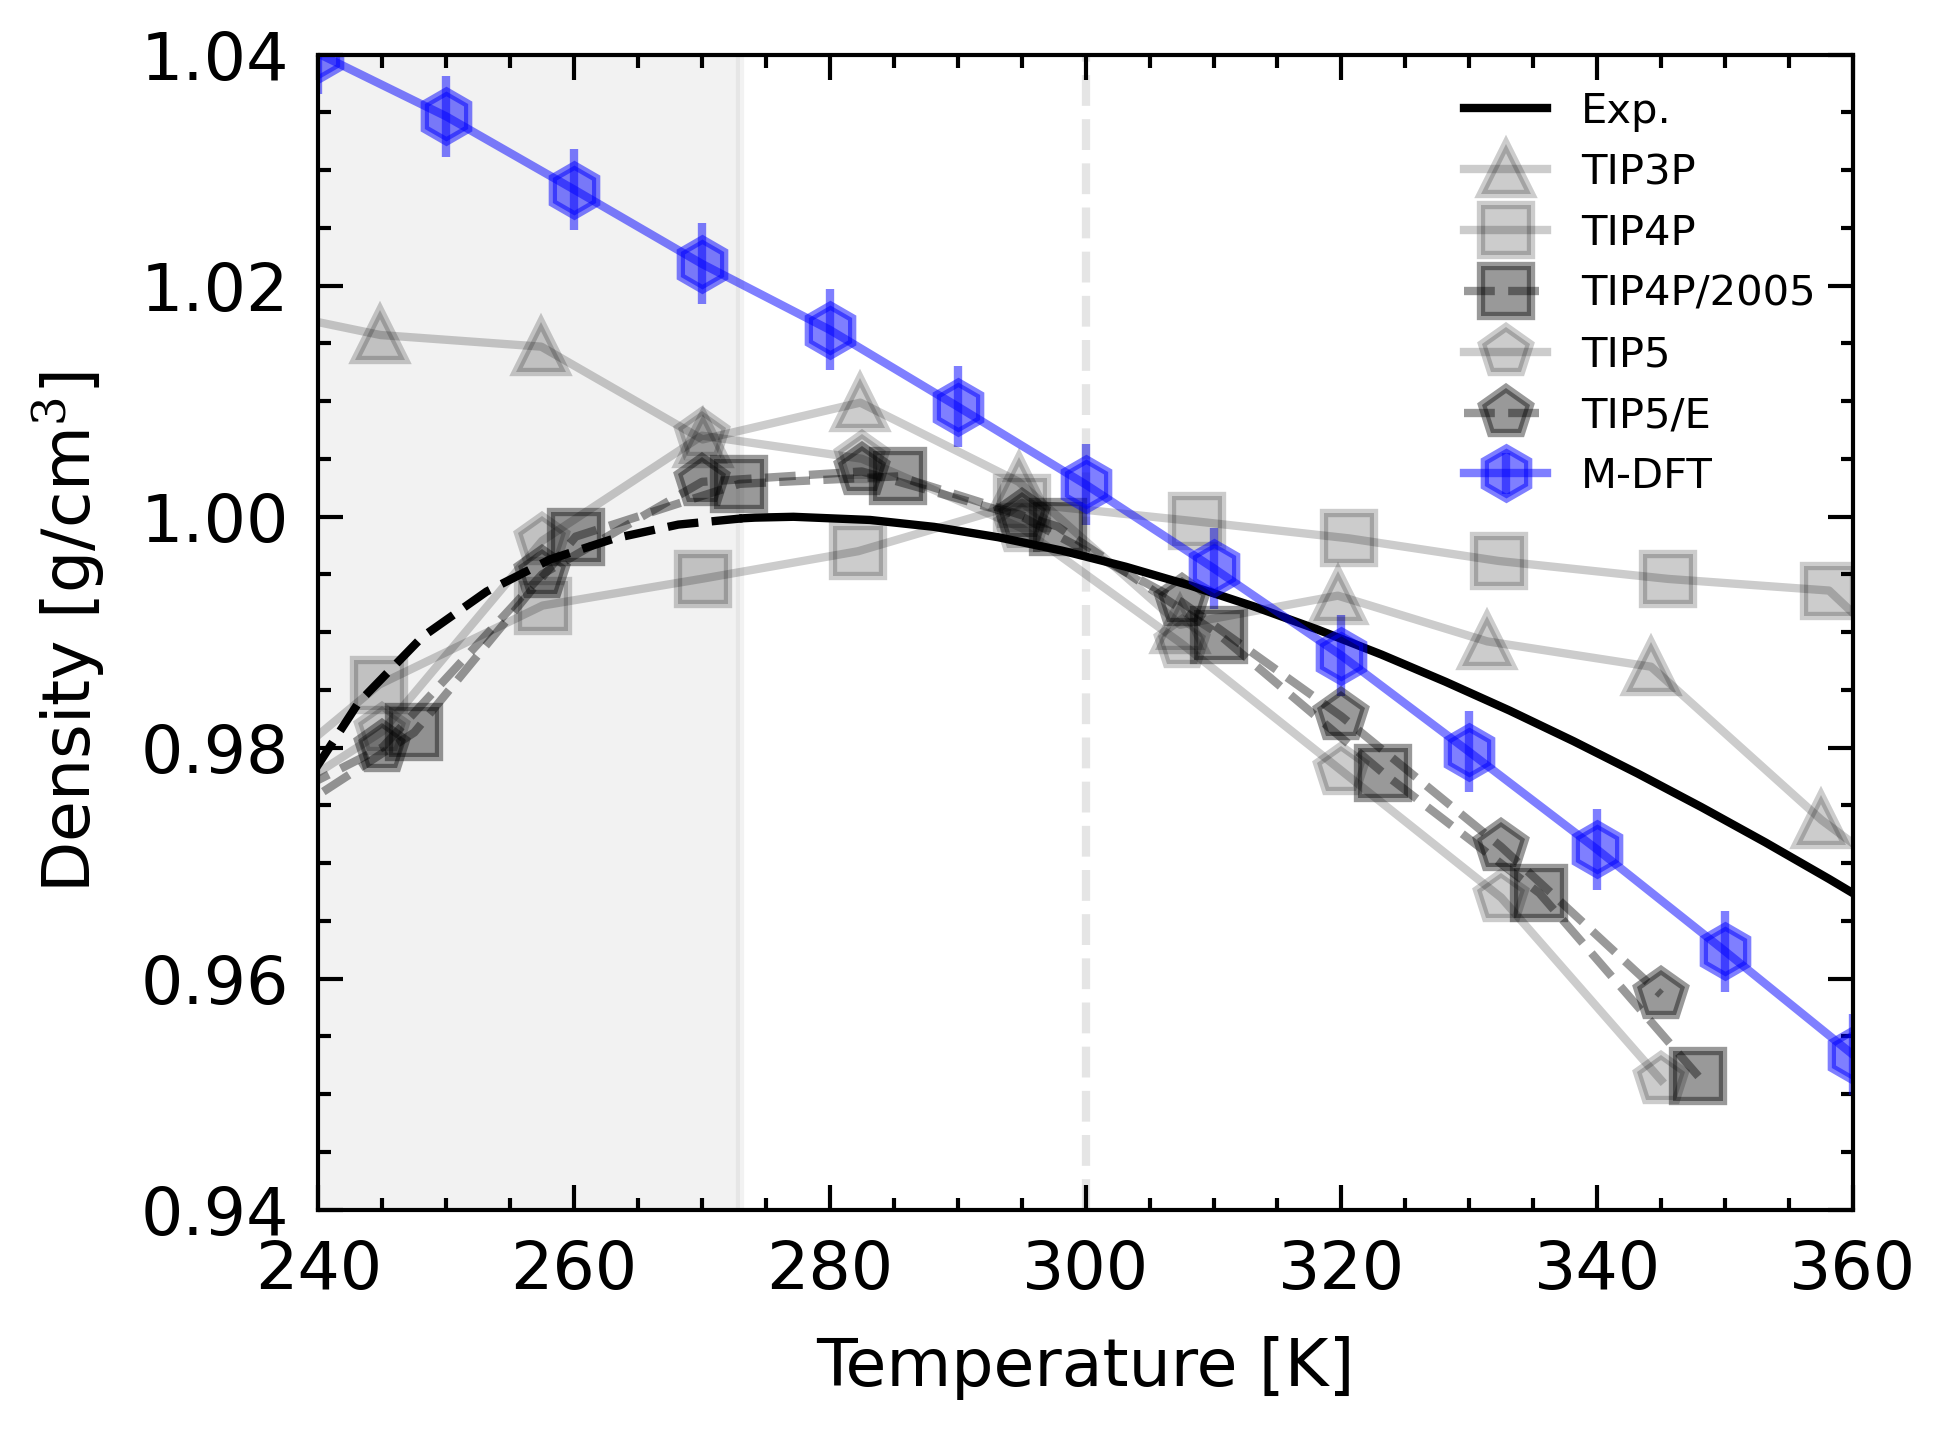

In [413]:
ax = plt.gca()
rhoT(ax)

In [414]:
all_rdfs

#  Final plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


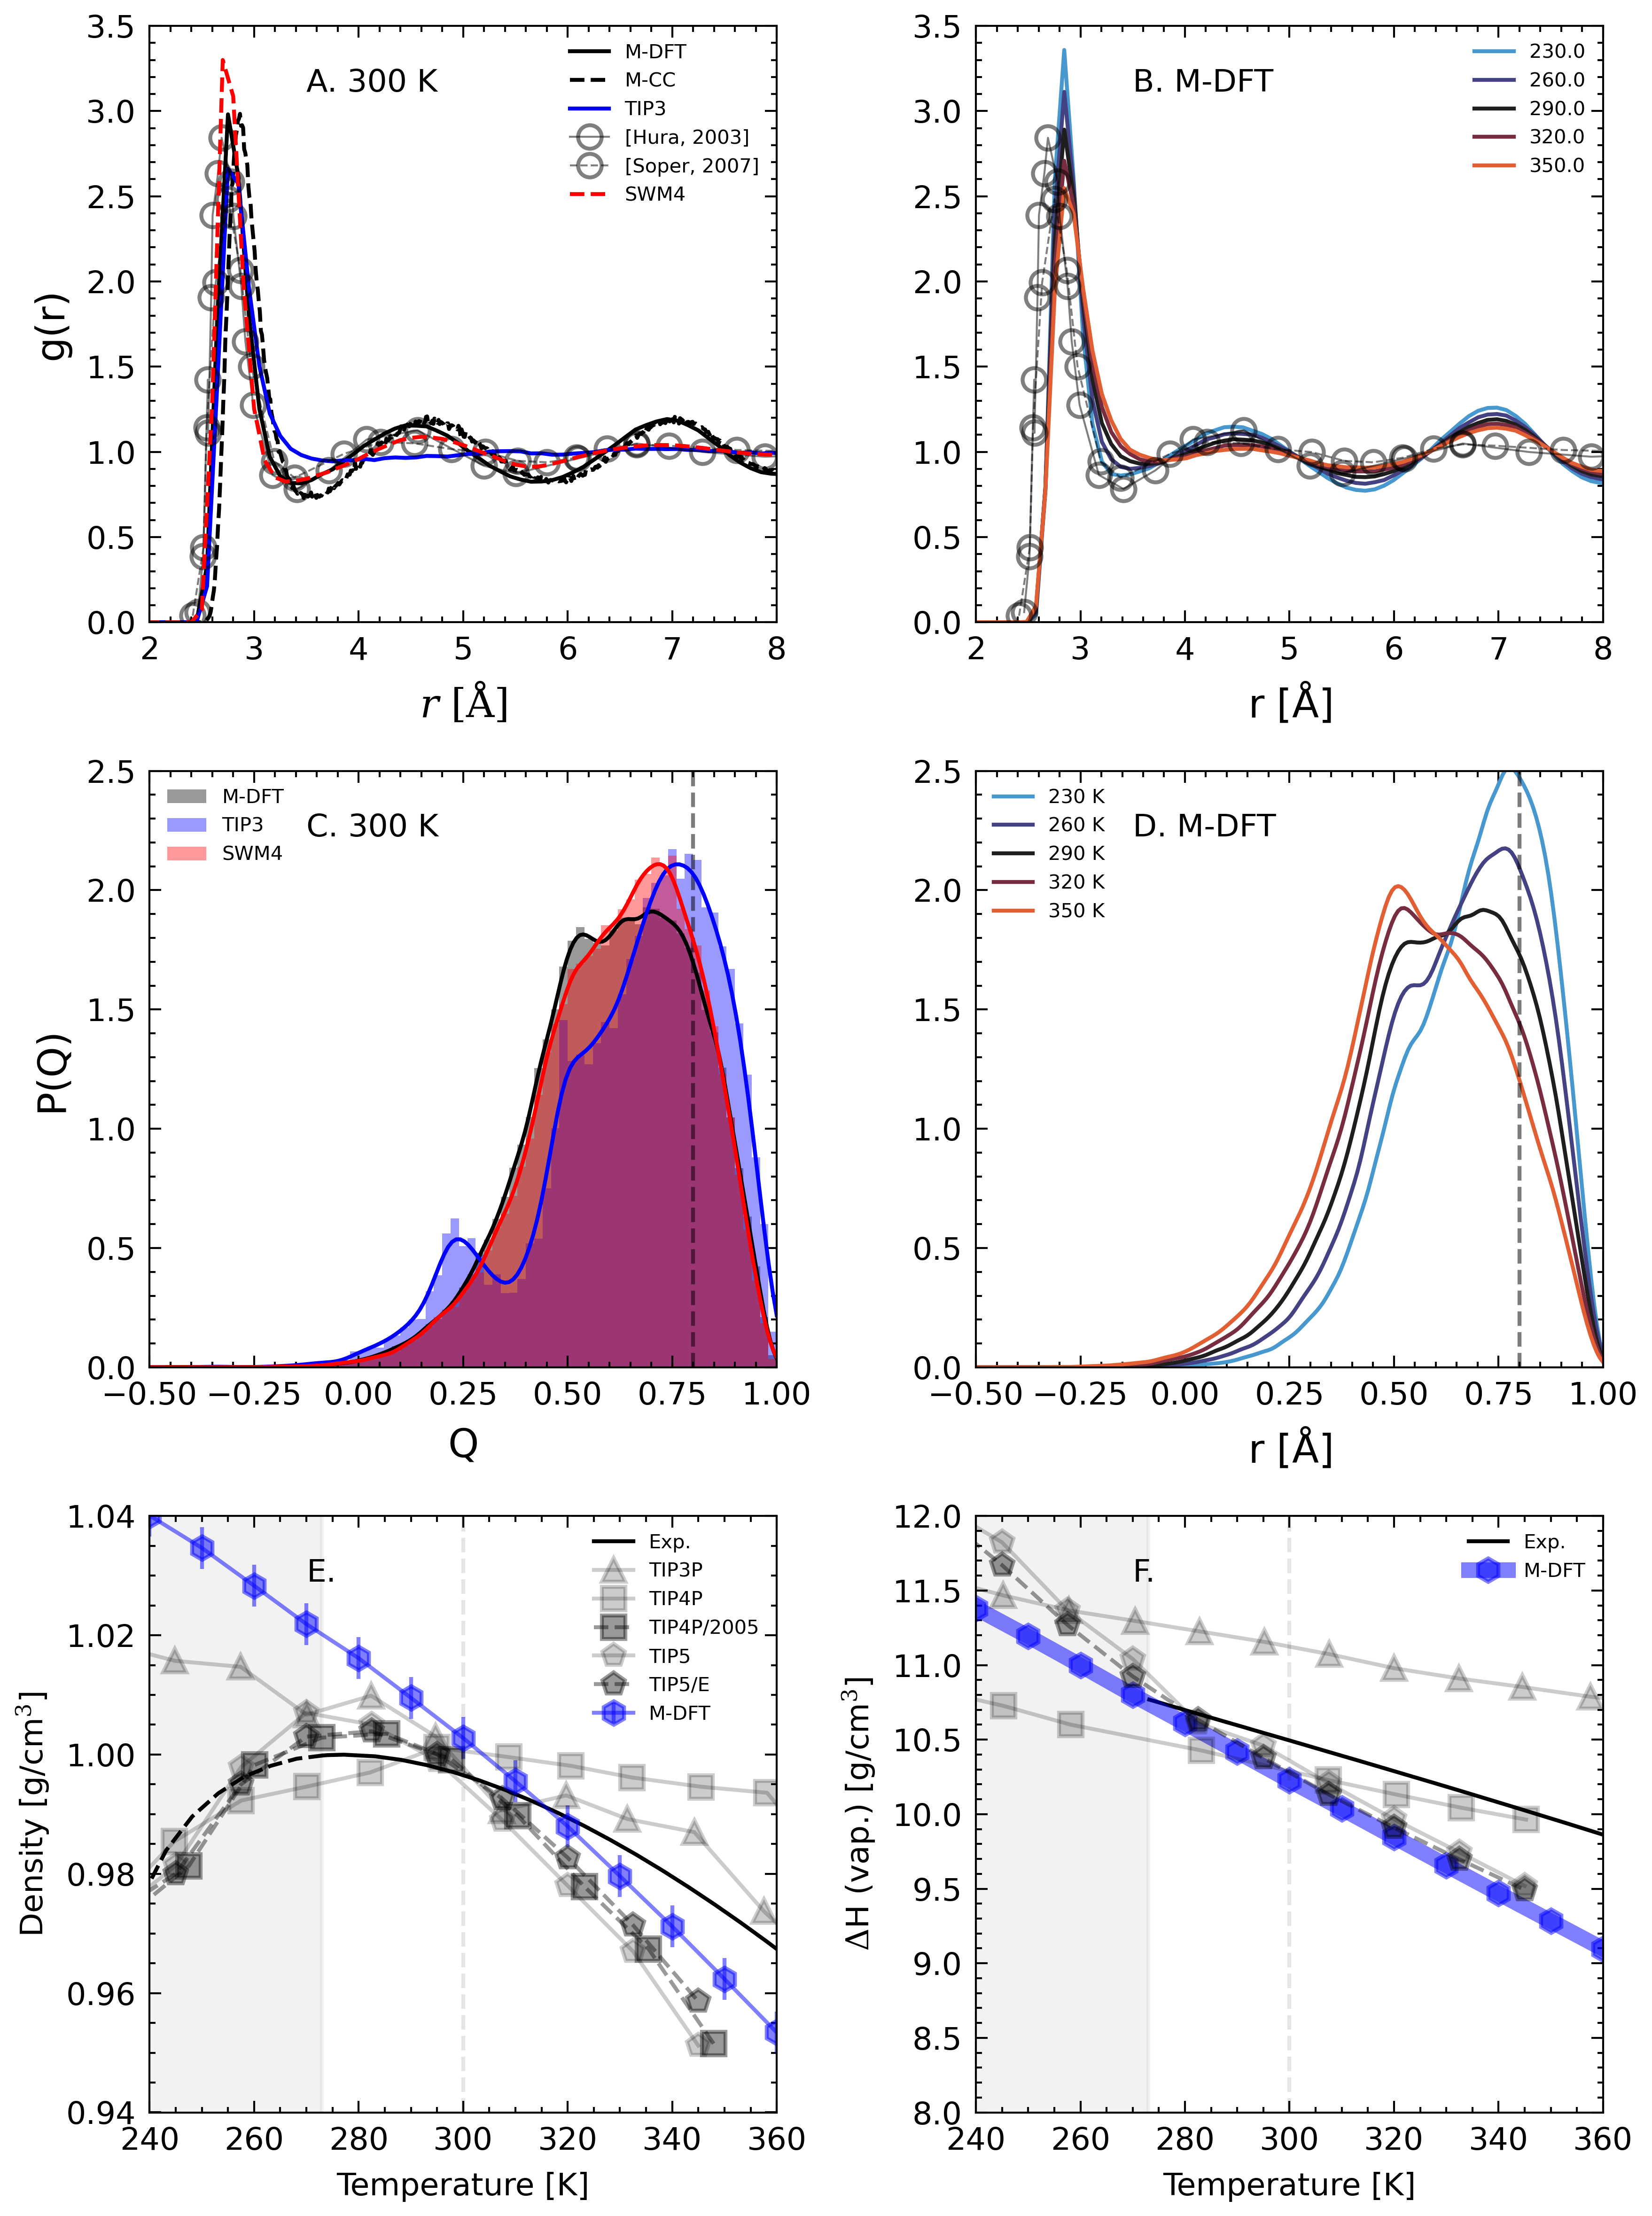

In [449]:
import matplotlib.pyplot as plt

# Create a 2x3 figure with shared y-axes by row
fig, axes = plt.subplots(3, 2, figsize=(6, 8), 
                        )
fig.subplots_adjust(wspace=0, hspace=0)

ax = axes[0,0]
rdfplot(ax)
ax.legend(fontsize=5)

ax = axes[0,1]

colors = sns.color_palette("icefire", len(temperatures[::3]))

c = 0
for i, T in enumerate(temperatures[::3]):
    rdf = all_rdfs[c]
    # all_rdfs.append(rdf)
    ax.plot(rdf.bins, rdf.rdf, "-", label=T, color=colors[c])
    c += 1
ax.legend(fontsize=5)    
plot_rdf_exp(ax, shift=0, c="k", lw=0.5, 
             linestyle="--", marker="o")
ax.set_xlim(2,8)

# ax.set_ylabel("$g(r)$", fontsize=FONTSIZE)
ax.set_xlabel("r $[\mathrm{Å}]$", fontsize=FONTSIZE)


colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i in temperatures[::3][:]:
    KMDCMoto = np.concatenate(
        [np.loadtxt(_) for _ in list(Path(".").glob(f"{i}*raw.dat"))]
    )
    FONTSIZE=10
    scale = 0.02

    ax = axes[1,1]
    ax.set_xlabel("Q", fontsize=FONTSIZE)
    # ax.set_ylabel("$P(Q)$", fontsize=FONTSIZE)
    sns.kdeplot(KMDCMoto, ax=ax, label=f"{i:.0f} K", color=colors[c],
                linestyle="-", clip= (-0.5, 1.0))
    
    c += 1
    ax.set_xlim(-0.5, 1)

ax.legend(fontsize=5)


ax.axvline(0.8, color="black", linestyle="--", alpha=0.51)


ax = axes[1,0]
# sns.kdeplot(KMDCMoto_300, ax=ax, label=f"300 K", color="k",
                # linestyle="-", clip= (-0.5, 1.0))
Qplot(ax)
# ax.legend(fontsize=5)
ax.set_xlim(-0.5, 1)
ax.set_xlabel("Q", fontsize=FONTSIZE)
ax.set_ylabel("P(Q)", fontsize=FONTSIZE)


ax = axes[2,1]
plotH(ax)
# ax.legend(fontsize=5)
ax = axes[2,0]
rhoT(ax)
ax.legend(fontsize=5)
axes[1,1].set_ylim(0,2.5)
axes[1,0].set_ylim(0,2.5)
axes[0,1].set_ylim(0,3.5)
axes[0,0].set_ylim(0,3.5)
axes[0,1].set_xlabel("$\mathsf{\it r}$ [$\mathsf{\\AA}$]", fontsize=FONTSIZE)
axes[1,1].set_xlabel("Q", fontsize=FONTSIZE)
axes[1,1].set_ylabel("", fontsize=FONTSIZE)
axes[1,1].set_xlabel("r [$\mathsf{\\AA}$]", fontsize=FONTSIZE)
axes[0,0].set_ylabel("g(r)", fontsize=FONTSIZE)


c = 0
tags = ["A. 300 K", "C. 300 K", "E.", "B. M-DFT", "D. M-DFT", "F."]
for i, t in enumerate(tags):
    c = i % 3
    r = i // 3
    axes[c,r].text(0.25, 0.89, tags[i], transform=axes[c,r].transAxes)
    
    
plt.tight_layout()
plt.savefig("T.pdf")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


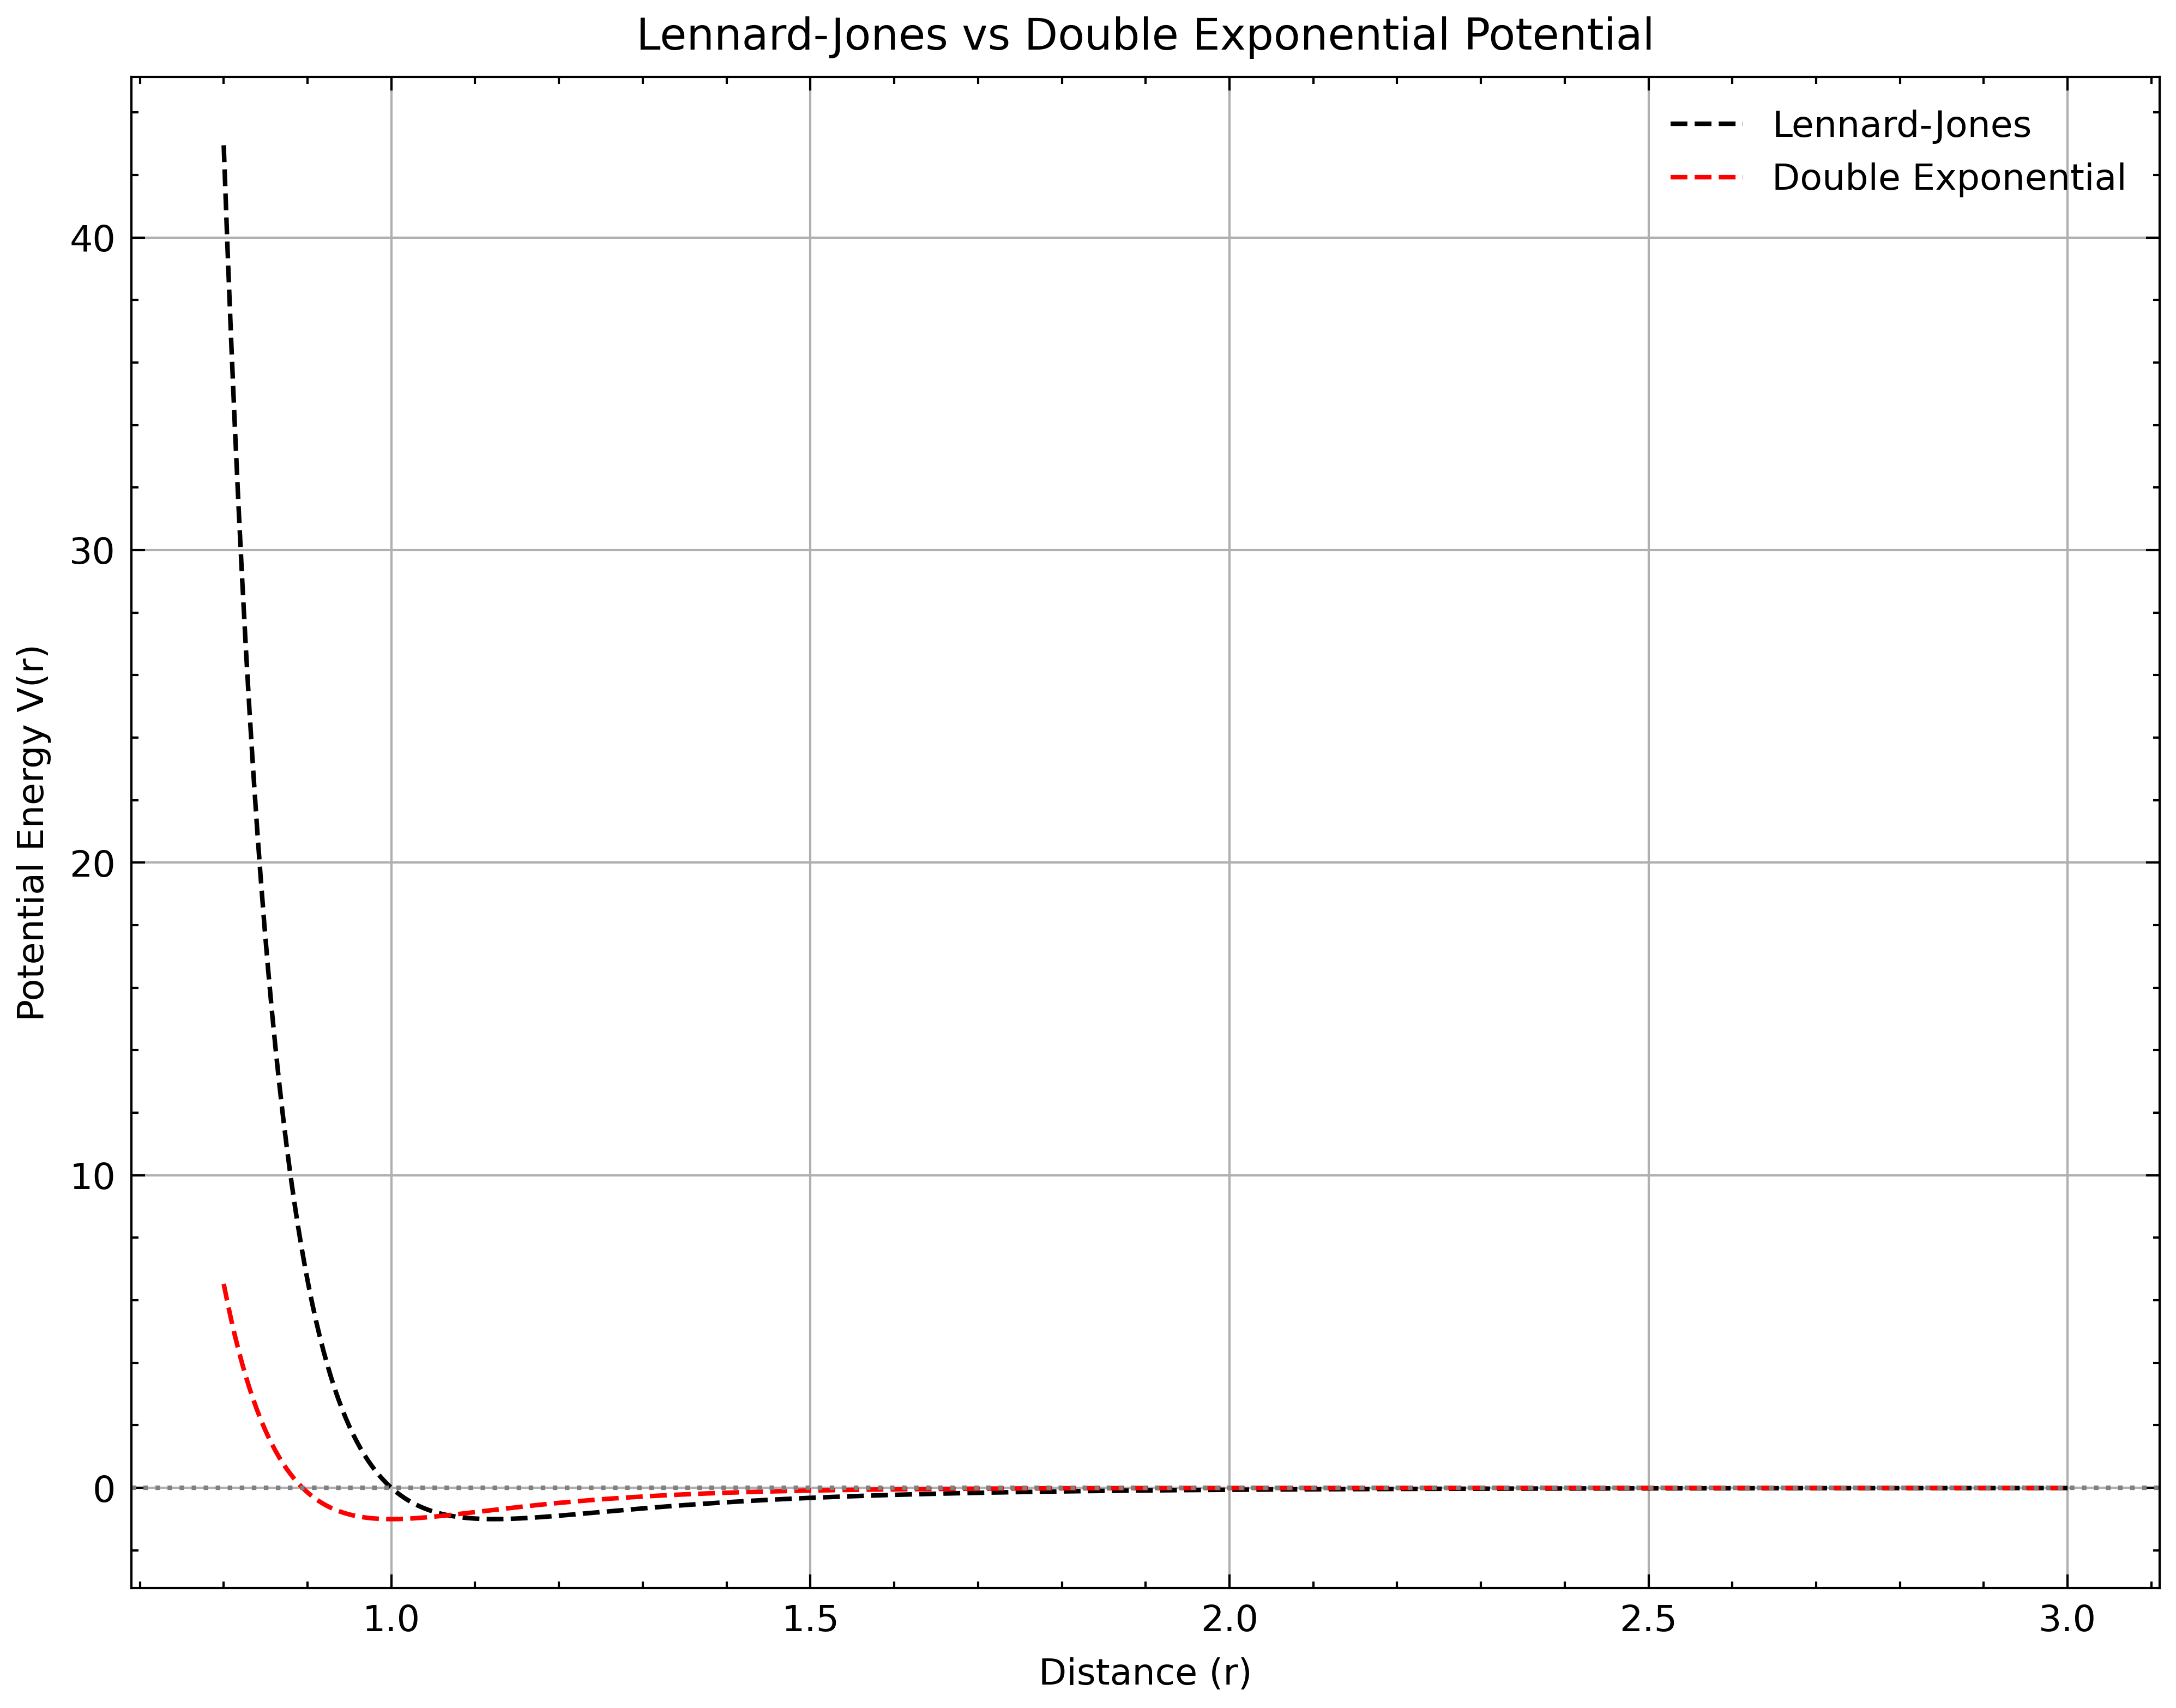

In [438]:
import numpy as np
import matplotlib.pyplot as plt

# Define range of r
r = np.linspace(0.8, 3.0, 500)

# LJ Parameters
epsilon_lj = 1.0
sigma_lj = 1.0
V_LJ = 4 * epsilon_lj * ((sigma_lj / r)**12 - (sigma_lj / r)**6)

# DE Parameters
epsilon_de = 1.0
r_m = 1.0
alpha = 14.0
beta = 6.0
V_DE = epsilon_de * ((beta / (alpha - beta)) * np.exp(-alpha * (r / r_m - 1)) -
                     (alpha / (alpha - beta)) * np.exp(-beta * (r / r_m - 1)))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(r, V_LJ, label="Lennard-Jones", linestyle='--')
plt.plot(r, V_DE, label="Double Exponential")
plt.axhline(0, color='gray', linestyle=':')
plt.title("Lennard-Jones vs Double Exponential Potential")
plt.xlabel("Distance (r)")
plt.ylabel("Potential Energy V(r)")
plt.legend()
plt.grid(True)
plt.show()

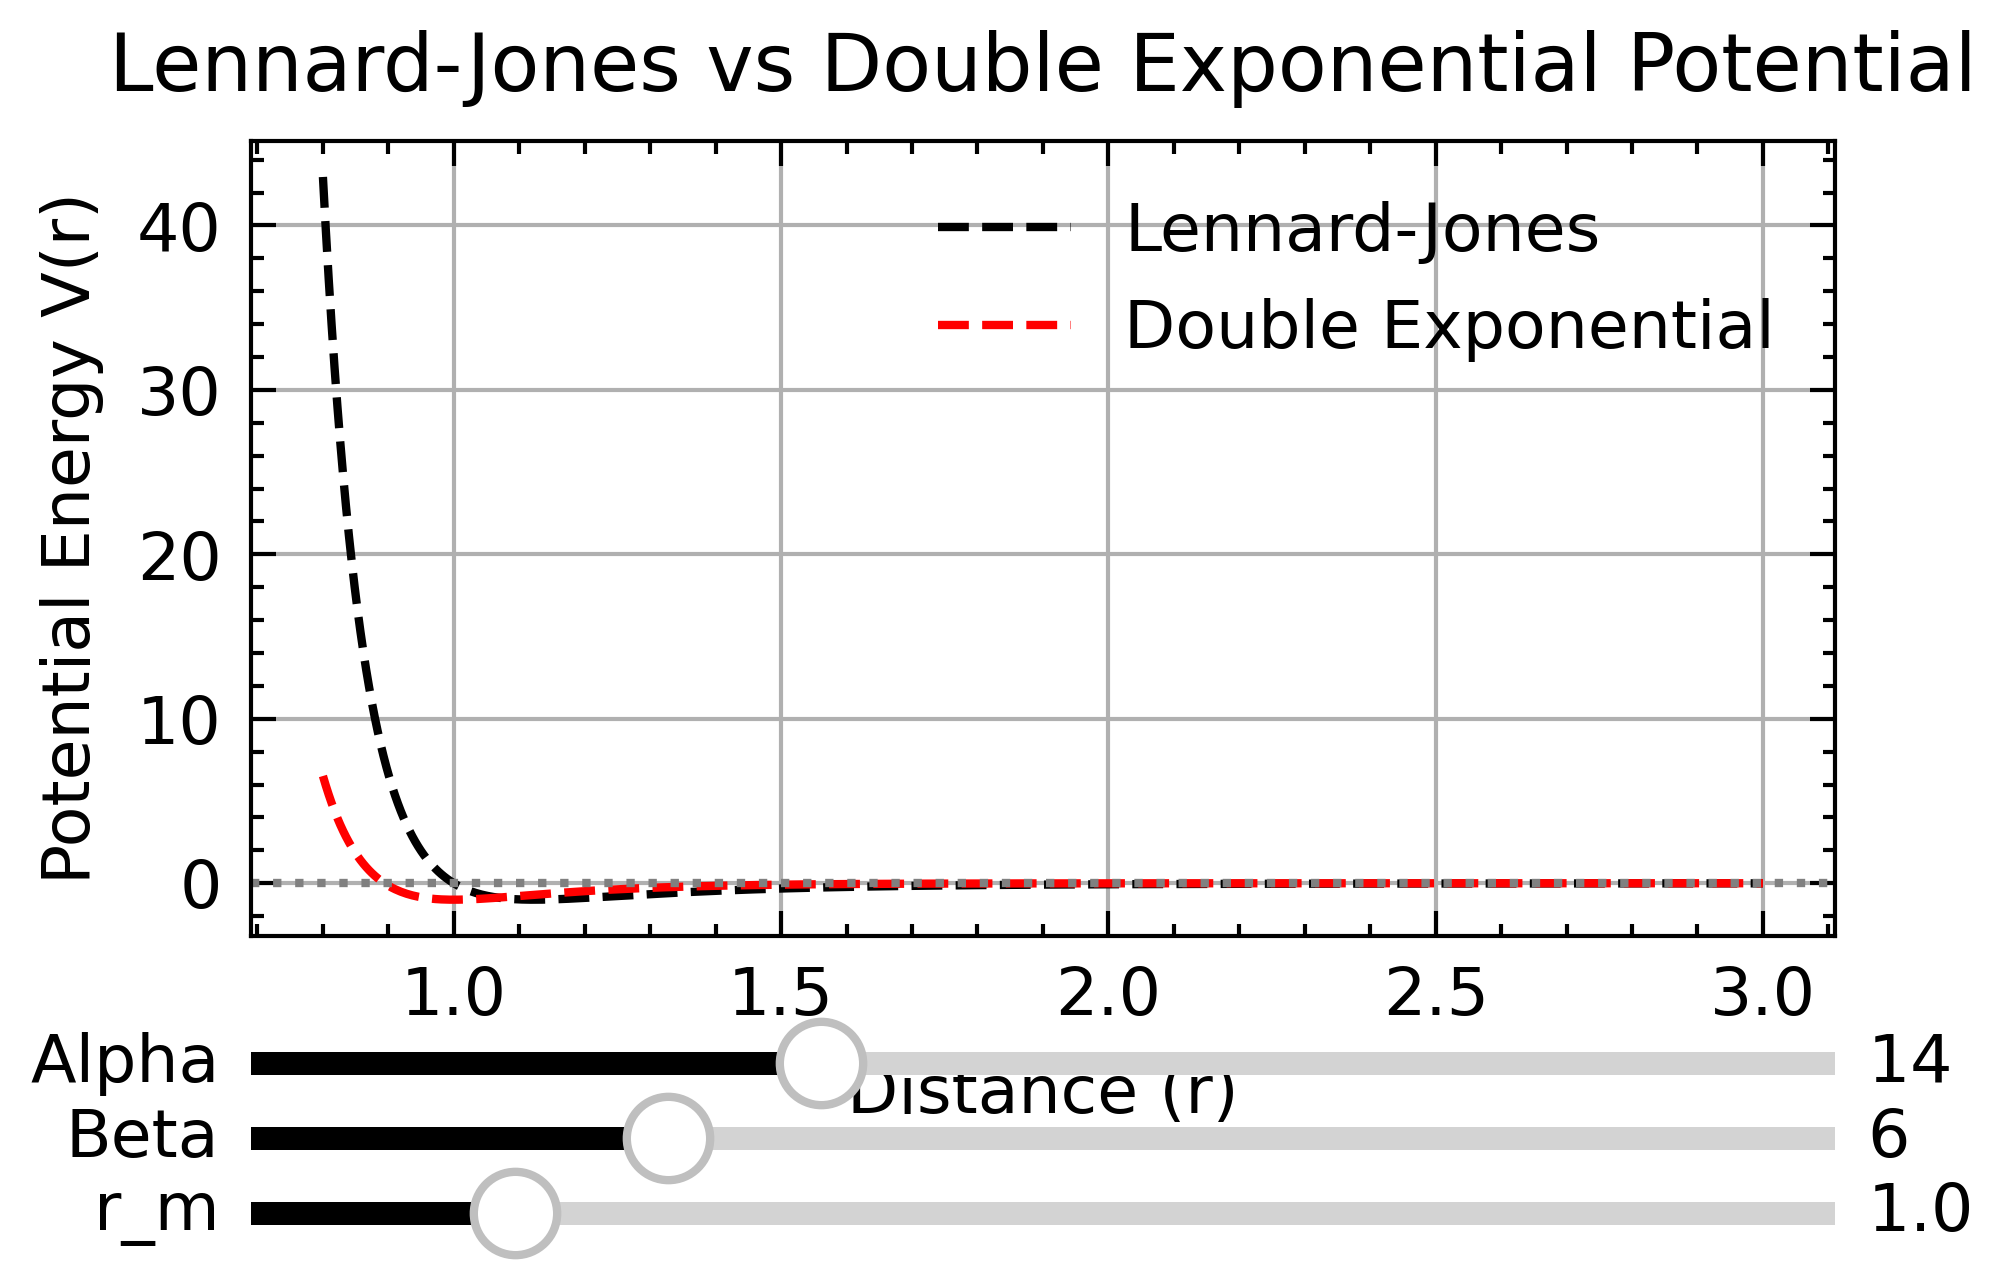

In [439]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Set up the figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.35)
line_lj, = ax.plot(r, V_LJ, label="Lennard-Jones", linestyle='--')
line_de, = ax.plot(r, V_DE, label="Double Exponential")
ax.axhline(0, color='gray', linestyle=':')
ax.set_title("Lennard-Jones vs Double Exponential Potential")
ax.set_xlabel("Distance (r)")
ax.set_ylabel("Potential Energy V(r)")
ax.legend()
ax.grid(True)

# Slider axes
ax_alpha = plt.axes([0.1, 0.25, 0.8, 0.03])
ax_beta = plt.axes([0.1, 0.2, 0.8, 0.03])
ax_rm = plt.axes([0.1, 0.15, 0.8, 0.03])

# Sliders
slider_alpha = Slider(ax_alpha, 'Alpha', 5.0, 30.0, valinit=alpha)
slider_beta = Slider(ax_beta, 'Beta', 1.0, 20.0, valinit=beta)
slider_rm = Slider(ax_rm, 'r_m', 0.8, 2.0, valinit=r_m)

# Update function
def update(val):
    alpha_val = slider_alpha.val
    beta_val = slider_beta.val
    rm_val = slider_rm.val
    V_DE_new = epsilon_de * ((beta_val / (alpha_val - beta_val)) * np.exp(-alpha_val * (r / rm_val - 1)) -
                             (alpha_val / (alpha_val - beta_val)) * np.exp(-beta_val * (r / rm_val - 1)))
    line_de.set_ydata(V_DE_new)
    fig.canvas.draw_idle()

# Connect sliders to update function
slider_alpha.on_changed(update)
slider_beta.on_changed(update)
slider_rm.on_changed(update)

plt.show()


In [441]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Distance range
r = np.linspace(0.8, 3.0, 500)

def plot_potentials(
    sigma_lj=1.0, epsilon_lj=1.0, n=12, m=6,
    alpha=14.0, beta=6.0, r_m=1.0, epsilon_de=1.0
):
    # Generalized LJ potential
    V_LJ = epsilon_lj * ((sigma_lj / r)**n - (sigma_lj / r)**m)

    # Double Exponential potential
    V_DE = epsilon_de * (
        (beta / (alpha - beta)) * np.exp(-alpha * (r / r_m - 1)) -
        (alpha / (alpha - beta)) * np.exp(-beta * (r / r_m - 1))
    )

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(r, V_LJ, '--', label=f"Gen LJ (σ={sigma_lj}, ε={epsilon_lj}, n={n}, m={m})")
    plt.plot(r, V_DE, label=f"Double Exp (α={alpha}, β={beta}, rₘ={r_m}, ε={epsilon_de})")
    plt.axhline(0, color='gray', linestyle=':')
    plt.xlabel("Distance (r)")
    plt.ylabel("Potential Energy V(r)")
    plt.title("Generalized Lennard-Jones vs Double Exponential")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive sliders
interact(
    plot_potentials,
    sigma_lj=FloatSlider(min=0.8, max=2.0, step=0.05, value=1.0, description='σ (LJ)'),
    epsilon_lj=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='ε (LJ)'),
    n=IntSlider(min=8, max=20, step=1, value=12, description='n (rep)'),
    m=IntSlider(min=4, max=12, step=1, value=6, description='m (att)'),
    alpha=FloatSlider(min=5, max=30, step=1, value=14, description='α (DE)'),
    beta=FloatSlider(min=1, max=20, step=1, value=6, description='β (DE)'),
    r_m=FloatSlider(min=0.8, max=2.0, step=0.05, value=1.0, description='rₘ (DE)'),
    epsilon_de=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='ε (DE)')
)


interactive(children=(FloatSlider(value=1.0, description='σ (LJ)', max=2.0, min=0.8, step=0.05), FloatSlider(v…

<function __main__.plot_potentials(sigma_lj=1.0, epsilon_lj=1.0, n=12, m=6, alpha=14.0, beta=6.0, r_m=1.0, epsilon_de=1.0)>